In [1263]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
warnings
import itertools
plt.style.use('ggplot')


In [849]:
RefugeesDF = pd.read_csv('refugeesAndMigrants.csv')
RefugeesDF
#01/01/93 shown three times, Happens with multiple dates with different amount of occurance depending on  
#The number of locations where bodies were found on that date, 3 different locations were reported for 01/01/93
#Have to deal with last 5 rows: 4 with the '1993' dates and the 1 with the NaN values 
#Possibly take out the only '1993' rows, but add their 6 deaths to '01/01/93' (first_date after)
#Orginal DF with 3,931

found dead  number                 name, gender, age    region of origin  \
0      05/05/18     4.0                      N.N. (1 man)              Africa   
1      30/04/18     2.0                      N.N. (2 men)             unknown   
2      30/04/18     1.0                      N.N. (woman)             unknown   
3      30/04/18     6.0              N.N. (1 baby; 5 men)             unknown   
4      30/04/18     1.0                        N.N. (man)             Algeria   
5      29/04/18    19.0                      N.N. (1 man)              Africa   
6      25/04/18    17.0                              N.N.  Sub-Saharan Africa   
7      22/04/18    11.0              N.N. (1 boy; 10 men)             unknown   
8      20/04/18     1.0              N.N. (boy, 6 months)             Eritrea   
9      20/04/18     1.0          Snaid Tadese (woman, 19)             Eritrea   
10     20/04/18     1.0                    N.N. (man, 30)             unknown   
11     19/04/18     2.0                              N.N.             unknown   
12     14/04/18     1.0                        N.N. (man)             unknown   
13     13/04/18     1.0                        N.N. (man)             unknown   
14     10/04/18     1.0                        N.N. (man)             unknown   
15     09/04/18     1.0                        N.N. (man)             unknown   
16     09/04/18    36.0                              N.N.             unknown   
17     06/04/18     1.0             Omar "Susi" (boy, 16)             Maghreb   
18     06/04/18     1.0                      N.N. (woman)             unknown   
19     02/04/18     1.0                        N.N. (man)             unknown   
20     01/04/18    11.0                      N.N. (1 man)             unknown   
21     01/04/18     1.0                        N.N. (man)             unknown   
22     01/04/18     1.0                        N.N. (man)             unknown   
23     31/03/18     1.0                              N.N.             unknown   
24     30/03/18    17.0                              N.N.             unknown   
25     29/03/18     7.0                      N.N. (7 men)             unknown   
26     28/03/18     1.0                    N.N. (boy, 16)             Eritrea   
27     24/03/18     1.0                      N.N. (woman)             unknown   
28     22/03/18     1.0                    N.N. (man, 22)             Algeria   
29     20/03/18     1.0                        N.N. (man)             unknown   
...         ...     ...                               ...                 ...   
3902   23/07/93     1.0      Nazmieh Chahrour (woman, 23)           Palestine   
3903   17/06/93     1.0             Abdi Atalan (man, 41)           Kurdistan   
3904   10/06/93     1.0                        N.N. (man)          Mozambique   
3905   26/05/93     1.0                              N.N.             Eritrea   
3906   26/05/93     1.0                              N.N.             Eritrea   
3907   26/05/93     1.0                              N.N.             Eritrea   
3908   06/05/93     1.0    Miroslawa Kolodziejska (w, 59)              Poland   
3909   01/05/93     1.0     Yilma Wondwossen B. (man, 31)            Ethiopia   
3910   23/04/93     1.0                    N.N. (man, 25)             Senegal   
3911   07/04/93     1.0                              N.N.               Zaire   
3912   01/04/93     2.0                     N.N. (28; 35)             Albania   
3913   23/03/93     1.0                    N.N. (man, 27)         Afghanistan   
3914   20/03/93     1.0                         N.N. (22)             Albania   
3915   16/03/93     1.0             Turan Pekoz (man, 43)              Turkey   
3916   03/03/93     1.0                        N.N. (man)              Turkey   
3917   26/01/93     1.0                       Bush Bacuma           Sri Lanka   
3918   26/01/93     2.0                              N.N.           Sri Lanka   
3919   26/01/93     1.0             

In [850]:
RefugeesDF.drop(RefugeesDF.tail(1).index, inplace = True)
#Took out Last 5 rows in dataframe (first 5 entries in the time-line)

In [851]:
RefugeesDF.set_value(3926,'number',7)
RefugeesDF
#Added 5 more deaths to 01/01/93 deaths to keep them in count

found dead  number                 name, gender, age    region of origin  \
0      05/05/18     4.0                      N.N. (1 man)              Africa   
1      30/04/18     2.0                      N.N. (2 men)             unknown   
2      30/04/18     1.0                      N.N. (woman)             unknown   
3      30/04/18     6.0              N.N. (1 baby; 5 men)             unknown   
4      30/04/18     1.0                        N.N. (man)             Algeria   
5      29/04/18    19.0                      N.N. (1 man)              Africa   
6      25/04/18    17.0                              N.N.  Sub-Saharan Africa   
7      22/04/18    11.0              N.N. (1 boy; 10 men)             unknown   
8      20/04/18     1.0              N.N. (boy, 6 months)             Eritrea   
9      20/04/18     1.0          Snaid Tadese (woman, 19)             Eritrea   
10     20/04/18     1.0                    N.N. (man, 30)             unknown   
11     19/04/18     2.0                              N.N.             unknown   
12     14/04/18     1.0                        N.N. (man)             unknown   
13     13/04/18     1.0                        N.N. (man)             unknown   
14     10/04/18     1.0                        N.N. (man)             unknown   
15     09/04/18     1.0                        N.N. (man)             unknown   
16     09/04/18    36.0                              N.N.             unknown   
17     06/04/18     1.0             Omar "Susi" (boy, 16)             Maghreb   
18     06/04/18     1.0                      N.N. (woman)             unknown   
19     02/04/18     1.0                        N.N. (man)             unknown   
20     01/04/18    11.0                      N.N. (1 man)             unknown   
21     01/04/18     1.0                        N.N. (man)             unknown   
22     01/04/18     1.0                        N.N. (man)             unknown   
23     31/03/18     1.0                              N.N.             unknown   
24     30/03/18    17.0                              N.N.             unknown   
25     29/03/18     7.0                      N.N. (7 men)             unknown   
26     28/03/18     1.0                    N.N. (boy, 16)             Eritrea   
27     24/03/18     1.0                      N.N. (woman)             unknown   
28     22/03/18     1.0                    N.N. (man, 22)             Algeria   
29     20/03/18     1.0                        N.N. (man)             unknown   
...         ...     ...                               ...                 ...   
3901   01/08/93     1.0           Joy Gardner (woman, 40)             Jamaica   
3902   23/07/93     1.0      Nazmieh Chahrour (woman, 23)           Palestine   
3903   17/06/93     1.0             Abdi Atalan (man, 41)           Kurdistan   
3904   10/06/93     1.0                        N.N. (man)          Mozambique   
3905   26/05/93     1.0                              N.N.             Eritrea   
3906   26/05/93     1.0                              N.N.             Eritrea   
3907   26/05/93     1.0                              N.N.             Eritrea   
3908   06/05/93     1.0    Miroslawa Kolodziejska (w, 59)              Poland   
3909   01/05/93     1.0     Yilma Wondwossen B. (man, 31)            Ethiopia   
3910   23/04/93     1.0                    N.N. (man, 25)             Senegal   
3911   07/04/93     1.0                              N.N.               Zaire   
3912   01/04/93     2.0                     N.N. (28; 35)             Albania   
3913   23/03/93     1.0                    N.N. (man, 27)         Afghanistan   
3914   20/03/93     1.0                         N.N. (22)             Albania   
3915   16/03/93     1.0             Turan Pekoz (man, 43)              Turkey   
3916   03/03/93     1.0                        N.N. (man)              Turkey   
3917   26/01/93     1.0                       Bush Bacuma           Sri Lanka   
3918   26/01/93     2.0             

In [852]:
RefugeesDF.isnull().sum()

found dead             0
number                 0
name, gender, age      0
region of origin       0
cause of death         0
source                 0
country of incident    0
dtype: int64

In [853]:
#New DF for focusing on Time Series
TS_Refugees_df = RefugeesDF[["found dead", "number"]]
TS_Refugees_df
#3898 has 'Sep 93' as it's date, need to check if there are others like that and fix them
#Begins with 3,926 rows

found dead  number
0      05/05/18     4.0
1      30/04/18     2.0
2      30/04/18     1.0
3      30/04/18     6.0
4      30/04/18     1.0
5      29/04/18    19.0
6      25/04/18    17.0
7      22/04/18    11.0
8      20/04/18     1.0
9      20/04/18     1.0
10     20/04/18     1.0
11     19/04/18     2.0
12     14/04/18     1.0
13     13/04/18     1.0
14     10/04/18     1.0
15     09/04/18     1.0
16     09/04/18    36.0
17     06/04/18     1.0
18     06/04/18     1.0
19     02/04/18     1.0
20     01/04/18    11.0
21     01/04/18     1.0
22     01/04/18     1.0
23     31/03/18     1.0
24     30/03/18    17.0
25     29/03/18     7.0
26     28/03/18     1.0
27     24/03/18     1.0
28     22/03/18     1.0
29     20/03/18     1.0
...         ...     ...
3901   01/08/93     1.0
3902   23/07/93     1.0
3903   17/06/93     1.0
3904   10/06/93     1.0
3905   26/05/93     1.0
3906   26/05/93     1.0
3907   26/05/93     1.0
3908   06/05/93     1.0
3909   01/05/93     1.0
3910   23/04/93     1.0
3911   07/04/93     1.0
3912   01/04/93     2.0
3913   23/03/93     1.0
3914   20/03/93     1.0
3915   16/03/93     1.0
3916   03/03/93     1.0
3917   26/01/93     1.0
3918   26/01/93     2.0
3919   26/01/93     1.0
3920   26/01/93     1.0
3921   21/01/93     1.0
3922   20/01/93     1.0
3923   04/01/93     1.0
3924   01/01/93     1.0
3925   01/01/93    11.0
3926   01/01/93     7.0
3927       1993     1.0
3928       1993     3.0
3929       1993     1.0
3930       1993     1.0

[3931 rows x 2 columns]

In [854]:
TS_Refugees_df[TS_Refugees_df['found dead'] == "3010/16"]
TS_Refugees_df.set_value(475,'found dead', "30/10/16")
#Quick Fix for one Messy Date missing a slash

found dead  number
0      05/05/18     4.0
1      30/04/18     2.0
2      30/04/18     1.0
3      30/04/18     6.0
4      30/04/18     1.0
5      29/04/18    19.0
6      25/04/18    17.0
7      22/04/18    11.0
8      20/04/18     1.0
9      20/04/18     1.0
10     20/04/18     1.0
11     19/04/18     2.0
12     14/04/18     1.0
13     13/04/18     1.0
14     10/04/18     1.0
15     09/04/18     1.0
16     09/04/18    36.0
17     06/04/18     1.0
18     06/04/18     1.0
19     02/04/18     1.0
20     01/04/18    11.0
21     01/04/18     1.0
22     01/04/18     1.0
23     31/03/18     1.0
24     30/03/18    17.0
25     29/03/18     7.0
26     28/03/18     1.0
27     24/03/18     1.0
28     22/03/18     1.0
29     20/03/18     1.0
...         ...     ...
3901   01/08/93     1.0
3902   23/07/93     1.0
3903   17/06/93     1.0
3904   10/06/93     1.0
3905   26/05/93     1.0
3906   26/05/93     1.0
3907   26/05/93     1.0
3908   06/05/93     1.0
3909   01/05/93     1.0
3910   23/04/93     1.0
3911   07/04/93     1.0
3912   01/04/93     2.0
3913   23/03/93     1.0
3914   20/03/93     1.0
3915   16/03/93     1.0
3916   03/03/93     1.0
3917   26/01/93     1.0
3918   26/01/93     2.0
3919   26/01/93     1.0
3920   26/01/93     1.0
3921   21/01/93     1.0
3922   20/01/93     1.0
3923   04/01/93     1.0
3924   01/01/93     1.0
3925   01/01/93    11.0
3926   01/01/93     7.0
3927       1993     1.0
3928       1993     3.0
3929       1993     1.0
3930       1993     1.0

[3931 rows x 2 columns]

In [855]:
MessedUpDF = TS_Refugees_df[TS_Refugees_df['found dead'].str.match('[A-Z][a-z]')]
Messy_Dates = MessedUpDF['found dead']
Messy_Dates
#Found all dates not in the right format, 455 rows to fix or delete
#Can Possibly search for each months string (EX: 'Jan/', think need to include space) and replace it with '01/01/'

141       Jan 18
142       Jan 18
193       Nov 17
194       Nov 17
195       Nov 17
196       Nov 17
213       Oct 17
214       Oct 17
258       Aug 17
259       Aug 17
281       Jul 17
314       Jun 17
345       May 17
346       May 17
347       May 17
348       May 17
409       Feb 17
439       Jan 17
450       Dec 16
492       Oct 16
499       Sep 16
568       Mar 16
569       Mar 16
570       Mar 16
571       Mar 16
603       Jan 16
626       Dec 15
627       Dec 15
628       Dec 15
629       Dec 15
          ...   
3646      Jun 96
3690      Jan 96
3703      Nov 95
3711      Oct 95
3712      Oct 95
3750      Jul 95
3751      Jul 95
3752      Jul 95
3763      Jun 95
3764      Jun 95
3765      Jun 95
3770      May 95
3784      Mar 95
3791      Feb 95
3792      Feb 95
3801      Jan 95
3802      Jan 95
3809      Dec 94
3812      Nov 94
3840      Aug 94
3853    Jun 1994
3859      May 94
3863      Apr 94
3864      Apr 94
3872    Feb 1994
3875      Jan 94
3876      Jan 94
3889      Dec 

In [856]:
MessedUpDF['number'].sum()
#Saving 2,865 deaths to remain in our dataset

2865.0

In [857]:
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Jan\s', value = '01/01/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Feb\s', value = '01/02/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Mar\s', value = '01/03/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Apr\s', value = '01/04/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='May\s', value = '01/05/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Jun\s', value = '01/06/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Jul\s', value = '01/07/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Aug\s', value = '01/08/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Sep\s', value = '01/09/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Oct\s', value = '01/10/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Nov\s', value = '01/11/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Dec\s', value = '01/12/', regex = True)
TS_Refugees_df
#Fix for all the Messy Dates by just adding the months since the years were already in the cells
#Manage to keep all 455 death counts for those messy days

found dead  number
0      05/05/18     4.0
1      30/04/18     2.0
2      30/04/18     1.0
3      30/04/18     6.0
4      30/04/18     1.0
5      29/04/18    19.0
6      25/04/18    17.0
7      22/04/18    11.0
8      20/04/18     1.0
9      20/04/18     1.0
10     20/04/18     1.0
11     19/04/18     2.0
12     14/04/18     1.0
13     13/04/18     1.0
14     10/04/18     1.0
15     09/04/18     1.0
16     09/04/18    36.0
17     06/04/18     1.0
18     06/04/18     1.0
19     02/04/18     1.0
20     01/04/18    11.0
21     01/04/18     1.0
22     01/04/18     1.0
23     31/03/18     1.0
24     30/03/18    17.0
25     29/03/18     7.0
26     28/03/18     1.0
27     24/03/18     1.0
28     22/03/18     1.0
29     20/03/18     1.0
...         ...     ...
3901   01/08/93     1.0
3902   23/07/93     1.0
3903   17/06/93     1.0
3904   10/06/93     1.0
3905   26/05/93     1.0
3906   26/05/93     1.0
3907   26/05/93     1.0
3908   06/05/93     1.0
3909   01/05/93     1.0
3910   23/04/93     1.0
3911   07/04/93     1.0
3912   01/04/93     2.0
3913   23/03/93     1.0
3914   20/03/93     1.0
3915   16/03/93     1.0
3916   03/03/93     1.0
3917   26/01/93     1.0
3918   26/01/93     2.0
3919   26/01/93     1.0
3920   26/01/93     1.0
3921   21/01/93     1.0
3922   20/01/93     1.0
3923   04/01/93     1.0
3924   01/01/93     1.0
3925   01/01/93    11.0
3926   01/01/93     7.0
3927       1993     1.0
3928       1993     3.0
3929       1993     1.0
3930       1993     1.0

[3931 rows x 2 columns]

In [858]:
YearsOnlyDF = TS_Refugees_df[TS_Refugees_df['found dead'].str.match('\d\d\d\d')]
A = YearsOnlyDF.index
YearsOnlyDF['found dead'].count()
#Finding amount of cells have only the year
# 54 is fairly small number
#willing to drop since planning for monthly interpretations and would bias predictions if I decided months 

54

In [859]:
YearsOnlyDF['number'].sum()
# 338 Deaths would be taken out of predicitons from just 50 dates/rows

338.0

In [860]:
TS_Refugees_df = TS_Refugees_df.drop(A)
TS_Refugees_df
#Removed the 54 Year Only Rows
#Need to fix Whole Year format for 1994, as well as one for 12/1/2000

found dead  number
0      05/05/18     4.0
1      30/04/18     2.0
2      30/04/18     1.0
3      30/04/18     6.0
4      30/04/18     1.0
5      29/04/18    19.0
6      25/04/18    17.0
7      22/04/18    11.0
8      20/04/18     1.0
9      20/04/18     1.0
10     20/04/18     1.0
11     19/04/18     2.0
12     14/04/18     1.0
13     13/04/18     1.0
14     10/04/18     1.0
15     09/04/18     1.0
16     09/04/18    36.0
17     06/04/18     1.0
18     06/04/18     1.0
19     02/04/18     1.0
20     01/04/18    11.0
21     01/04/18     1.0
22     01/04/18     1.0
23     31/03/18     1.0
24     30/03/18    17.0
25     29/03/18     7.0
26     28/03/18     1.0
27     24/03/18     1.0
28     22/03/18     1.0
29     20/03/18     1.0
...         ...     ...
3897   02/09/93     2.0
3898   01/09/93     1.0
3899   15/08/93     1.0
3900   09/08/93     1.0
3901   01/08/93     1.0
3902   23/07/93     1.0
3903   17/06/93     1.0
3904   10/06/93     1.0
3905   26/05/93     1.0
3906   26/05/93     1.0
3907   26/05/93     1.0
3908   06/05/93     1.0
3909   01/05/93     1.0
3910   23/04/93     1.0
3911   07/04/93     1.0
3912   01/04/93     2.0
3913   23/03/93     1.0
3914   20/03/93     1.0
3915   16/03/93     1.0
3916   03/03/93     1.0
3917   26/01/93     1.0
3918   26/01/93     2.0
3919   26/01/93     1.0
3920   26/01/93     1.0
3921   21/01/93     1.0
3922   20/01/93     1.0
3923   04/01/93     1.0
3924   01/01/93     1.0
3925   01/01/93    11.0
3926   01/01/93     7.0

[3877 rows x 2 columns]

In [861]:
TS_Refugees_df.set_value(3853,'found dead', "01/06/94")
TS_Refugees_df.set_value(3872,'found dead', "01/02/94")
TS_Refugees_df.set_value(3047,'found dead', "12/01/00")
#Fixing those Last three Date format errors

found dead  number
0      05/05/18     4.0
1      30/04/18     2.0
2      30/04/18     1.0
3      30/04/18     6.0
4      30/04/18     1.0
5      29/04/18    19.0
6      25/04/18    17.0
7      22/04/18    11.0
8      20/04/18     1.0
9      20/04/18     1.0
10     20/04/18     1.0
11     19/04/18     2.0
12     14/04/18     1.0
13     13/04/18     1.0
14     10/04/18     1.0
15     09/04/18     1.0
16     09/04/18    36.0
17     06/04/18     1.0
18     06/04/18     1.0
19     02/04/18     1.0
20     01/04/18    11.0
21     01/04/18     1.0
22     01/04/18     1.0
23     31/03/18     1.0
24     30/03/18    17.0
25     29/03/18     7.0
26     28/03/18     1.0
27     24/03/18     1.0
28     22/03/18     1.0
29     20/03/18     1.0
...         ...     ...
3897   02/09/93     2.0
3898   01/09/93     1.0
3899   15/08/93     1.0
3900   09/08/93     1.0
3901   01/08/93     1.0
3902   23/07/93     1.0
3903   17/06/93     1.0
3904   10/06/93     1.0
3905   26/05/93     1.0
3906   26/05/93     1.0
3907   26/05/93     1.0
3908   06/05/93     1.0
3909   01/05/93     1.0
3910   23/04/93     1.0
3911   07/04/93     1.0
3912   01/04/93     2.0
3913   23/03/93     1.0
3914   20/03/93     1.0
3915   16/03/93     1.0
3916   03/03/93     1.0
3917   26/01/93     1.0
3918   26/01/93     2.0
3919   26/01/93     1.0
3920   26/01/93     1.0
3921   21/01/93     1.0
3922   20/01/93     1.0
3923   04/01/93     1.0
3924   01/01/93     1.0
3925   01/01/93    11.0
3926   01/01/93     7.0

[3877 rows x 2 columns]

In [862]:
DailyDeaths_TS_Refugees_df = TS_Refugees_df.groupby(['found dead']).sum()
DailyDeaths_TS_Refugees_df
#Dataframe Grouped by the DAY for Total Deaths reported for that each day
#'found dead' (the dates) becomes the new index
#Have 2,407 different days where deaths were reported

number
found dead        
01/01/00       7.0
01/01/01      32.0
01/01/02      26.0
01/01/03       8.0
01/01/04       1.0
01/01/05       1.0
01/01/06       1.0
01/01/07       4.0
01/01/08      18.0
01/01/09      13.0
01/01/10       1.0
01/01/12      38.0
01/01/15      31.0
01/01/16       3.0
01/01/17       1.0
01/01/18       3.0
01/01/93      19.0
01/01/94       5.0
01/01/95       3.0
01/01/96       1.0
01/01/97       8.0
01/01/99       9.0
01/02/00      16.0
01/02/01       4.0
01/02/02       5.0
01/02/03       6.0
01/02/04       1.0
01/02/05       2.0
01/02/06       3.0
01/02/07       1.0
...            ...
31/03/11      70.0
31/03/12      10.0
31/03/16       1.0
31/03/18       1.0
31/05/03      15.0
31/05/14       1.0
31/05/17      14.0
31/07/03      15.0
31/07/04       5.0
31/07/08      17.0
31/07/13      24.0
31/07/16       1.0
31/07/17       1.0
31/08/02       5.0
31/08/10       2.0
31/08/14     105.0
31/08/17      15.0
31/08/97       1.0
31/10/05       2.0
31/10/15       1.0
31/10/98       1.0
31/10/99       6.0
31/12/00       1.0
31/12/06      33.0
31/12/09      22.0
31/12/12       2.0
31/12/17      64.0
31/12/97       1.0
31/12/98      11.0
31/12/99      99.0

[2407 rows x 1 columns]

In [863]:
#Finished cleaning up Dates format, summed up Same days so have Daily Counts for Deaths 
#Can now change into datetime format

In [864]:
DailyDeaths_TS_Refugees_df.index = pd.to_datetime(DailyDeaths_TS_Refugees_df.index, format='%d/%m/%y')
DailyDeaths_TS_Refugees_df.info()
#Changing the new 'found dead' index to Datetime type with proper format

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2407 entries, 2000-01-01 to 1999-12-31
Data columns (total 1 columns):
number    2407 non-null float64
dtypes: float64(1)
memory usage: 37.6 KB


In [865]:
DailyDeaths_TS_Refugees_df.index

DatetimeIndex(['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01',
               ...
               '1998-10-31', '1999-10-31', '2000-12-31', '2006-12-31',
               '2009-12-31', '2012-12-31', '2017-12-31', '1997-12-31',
               '1998-12-31', '1999-12-31'],
              dtype='datetime64[ns]', name='found dead', length=2407, freq=None)

In [866]:
DailyDeaths_TS_Refugees_df
#Now Have 'Year-Month-Day' format, with datetime 'type' and set as the index for Daily Deaths
#2,407 rows = Days Total 

number
found dead        
2000-01-01     7.0
2001-01-01    32.0
2002-01-01    26.0
2003-01-01     8.0
2004-01-01     1.0
2005-01-01     1.0
2006-01-01     1.0
2007-01-01     4.0
2008-01-01    18.0
2009-01-01    13.0
2010-01-01     1.0
2012-01-01    38.0
2015-01-01    31.0
2016-01-01     3.0
2017-01-01     1.0
2018-01-01     3.0
1993-01-01    19.0
1994-01-01     5.0
1995-01-01     3.0
1996-01-01     1.0
1997-01-01     8.0
1999-01-01     9.0
2000-02-01    16.0
2001-02-01     4.0
2002-02-01     5.0
2003-02-01     6.0
2004-02-01     1.0
2005-02-01     2.0
2006-02-01     3.0
2007-02-01     1.0
...            ...
2011-03-31    70.0
2012-03-31    10.0
2016-03-31     1.0
2018-03-31     1.0
2003-05-31    15.0
2014-05-31     1.0
2017-05-31    14.0
2003-07-31    15.0
2004-07-31     5.0
2008-07-31    17.0
2013-07-31    24.0
2016-07-31     1.0
2017-07-31     1.0
2002-08-31     5.0
2010-08-31     2.0
2014-08-31   105.0
2017-08-31    15.0
1997-08-31     1.0
2005-10-31     2.0
2015-10-31     1.0
1998-10-31     1.0
1999-10-31     6.0
2000-12-31     1.0
2006-12-31    33.0
2009-12-31    22.0
2012-12-31     2.0
2017-12-31    64.0
1997-12-31     1.0
1998-12-31    11.0
1999-12-31    99.0

[2407 rows x 1 columns]

In [867]:
MonthlyDeathsDF = DailyDeaths_TS_Refugees_df[:"2017"].groupby(pd.Grouper(freq = 'MS')).sum()
MonthlyDeathsDF
#300 Months from 1993-2017, excluding 2018 since doesn't have full dataset 

number
found dead        
1993-01-01    27.0
1993-02-01     0.0
1993-03-01     4.0
1993-04-01     4.0
1993-05-01     5.0
1993-06-01     2.0
1993-07-01     1.0
1993-08-01     3.0
1993-09-01     4.0
1993-10-01     3.0
1993-11-01     3.0
1993-12-01     5.0
1994-01-01     7.0
1994-02-01     8.0
1994-03-01     4.0
1994-04-01     5.0
1994-05-01    12.0
1994-06-01     7.0
1994-07-01     6.0
1994-08-01     8.0
1994-09-01    14.0
1994-10-01    21.0
1994-11-01    14.0
1994-12-01     6.0
1995-01-01    14.0
1995-02-01     8.0
1995-03-01    10.0
1995-04-01     5.0
1995-05-01     5.0
1995-06-01    13.0
...            ...
2015-07-01   128.0
2015-08-01   659.0
2015-09-01   259.0
2015-10-01   336.0
2015-11-01   182.0
2015-12-01   189.0
2016-01-01   210.0
2016-02-01    69.0
2016-03-01    59.0
2016-04-01  1053.0
2016-05-01  1178.0
2016-06-01   178.0
2016-07-01   144.0
2016-08-01    10.0
2016-09-01   227.0
2016-10-01   217.0
2016-11-01   629.0
2016-12-01    18.0
2017-01-01   343.0
2017-02-01   282.0
2017-03-01   414.0
2017-04-01   397.0
2017-05-01   696.0
2017-06-01   664.0
2017-07-01   155.0
2017-08-01   183.0
2017-09-01   173.0
2017-10-01   184.0
2017-11-01   310.0
2017-12-01   107.0

[300 rows x 1 columns]

In [868]:
DailyDeaths_TS_Refugees_df.number.sum()
#34,028 = Total Deaths in our DataSet

34028.0

In [869]:
DailyDeaths_TS_Refugees_df.isnull().sum()
#No NaN values 

number    0
dtype: int64

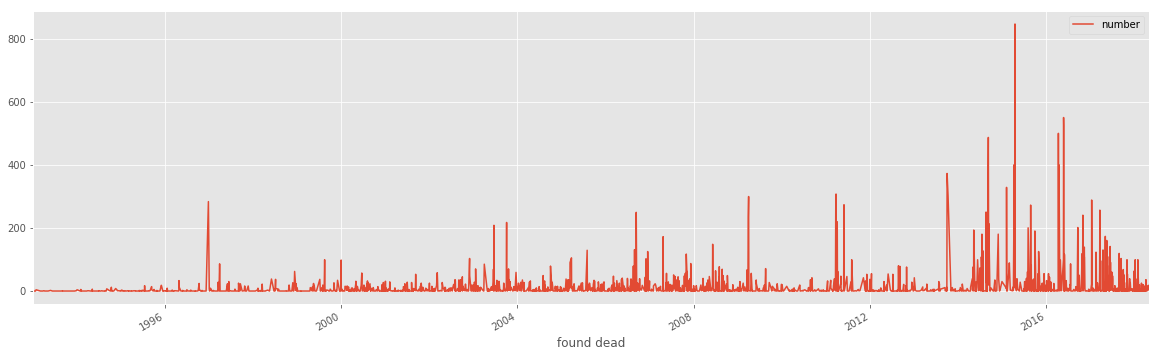

In [870]:
DailyDeaths_TS_Refugees_df.plot(figsize = (20,6))
plt.show()

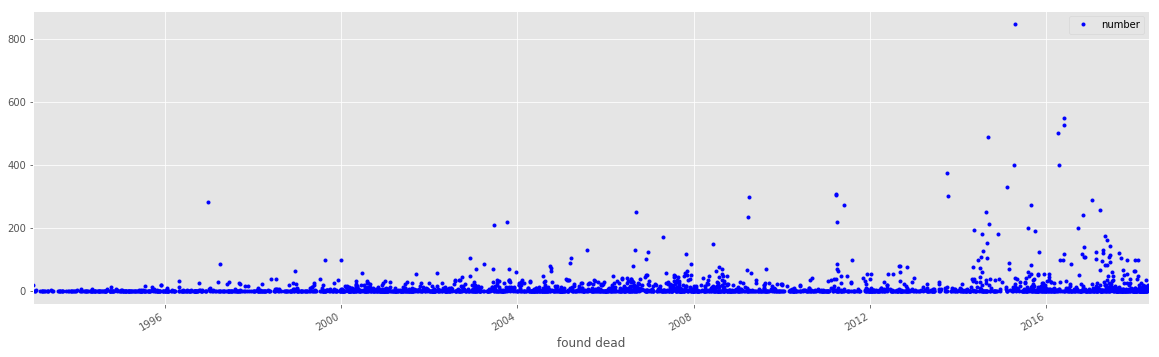

In [871]:
DailyDeaths_TS_Refugees_df.plot(figsize = (20,6), style = ".b")
plt.show()

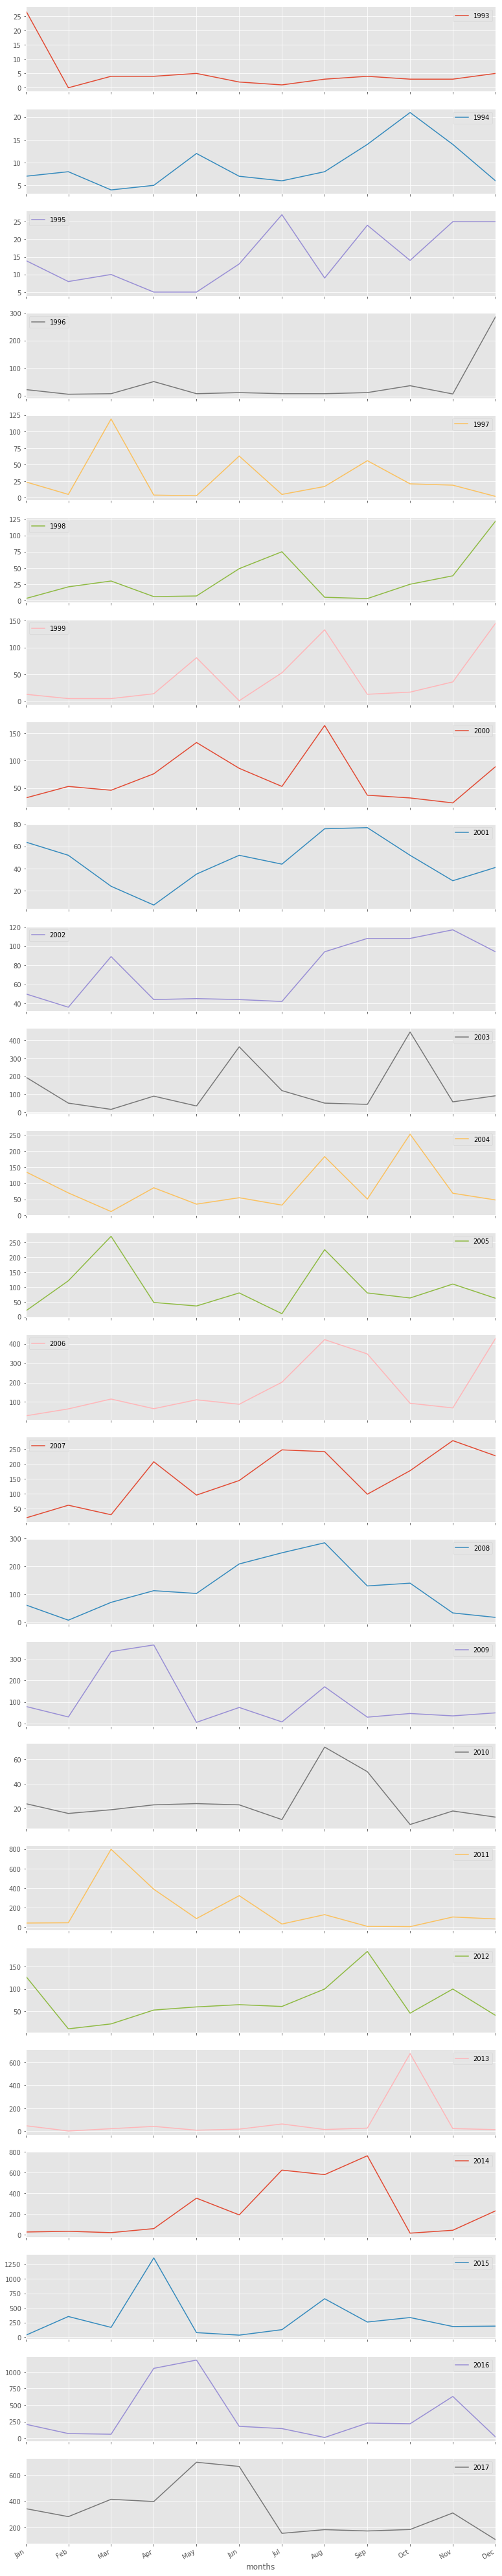

In [872]:
#Grouping Anually to Visualize yearly trends, with monthly values
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
year_groups = DailyDeaths_TS_Refugees_df[:"2017"].groupby(pd.Grouper(freq = 'MS')).sum().groupby(pd.Grouper(freq = "YS"))
Annual_Deaths = pd.DataFrame()
for yr, group in year_groups:
    Annual_Deaths[yr.year] = group.values.ravel()
Annual_Deaths
Annual_Deaths.plot(figsize = (13,80), subplots=True, legend=True)
plt.xlabel("months")
plt.xticks(range(12), months)
plt.show()
#Frightening to watch how over the years, deaths continually increased, breaking maximums 6 times over 24 years
#Also shows increase in average amount of accounted (reported) deaths over the years 
#Looks like 1999 and 2000 almost mimic eachother
#Seems there are Significant increases during late 1996 with waves in 1997 being mimiced by the following years,
#Another Large Increase in 2006 With a new max of 400, with a similar trend but lower number for the next two years
#Large New Spike in Mar 2011 with new max of 800, Sept/Aug 2013 with 600, Sept 2014 was 800, April 2015 Max= 1250
#SPike starting Mar-May 2016
#Seems there are Significant decreases during 1993 and mostly all of 1994, and 1996 with both a rise at the end, 
#Also Decreases in Early 2006 till half way with a quick Significant increase starting May, same with May-Mar 2015-16
#Odd steady low count during Feb-May in 2002, also during Mar-July 2004, Jan-Jul 2010, Jul-2011 through Sept 2013 
#Steady High Death counts from Jan-Jul 2017



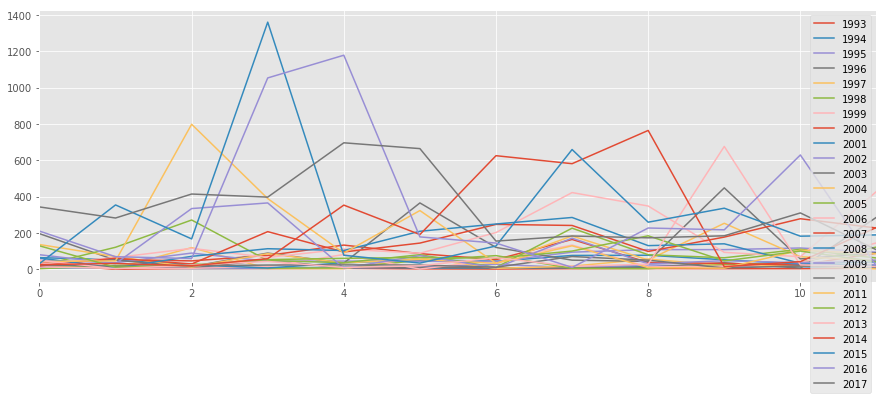

In [873]:
Annual_Deaths.plot(figsize = (15,5), subplots=False, legend=True)
plt.show()

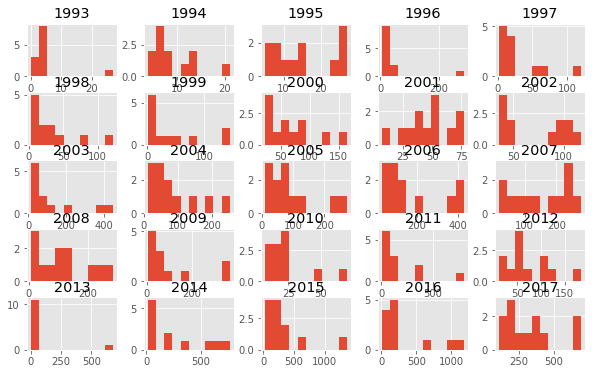

In [874]:
Annual_Deaths.hist(figsize = (10,6))
plt.show()

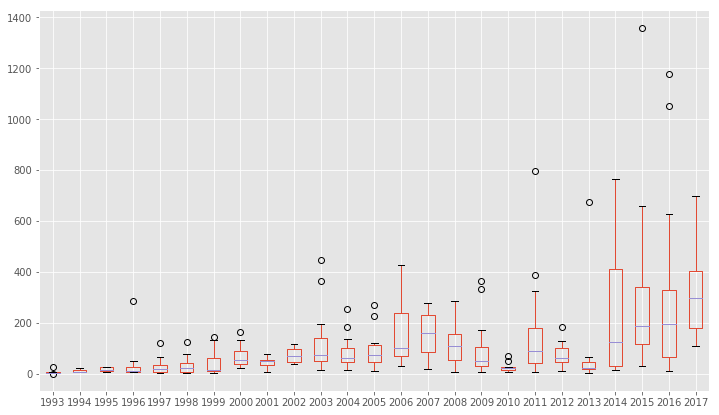

In [875]:
# Generate a box and whiskers plot for temp_annual dataframe
Annual_Deaths.boxplot(figsize = (12,7))
plt.show()

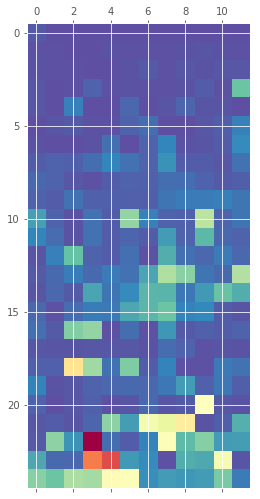

In [876]:
year_matrix = Annual_Deaths.T
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
plt.show()

In [877]:
rolmean = MonthlyDeathsDF.number.rolling(window = 8, center = False).mean()
rolstd = MonthlyDeathsDF.number.rolling(window = 8, center = False).std()

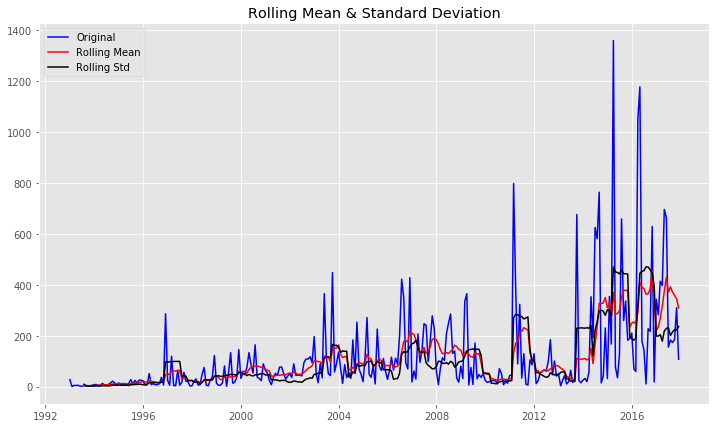

In [878]:
fig = plt.figure(figsize=(12,7))
orig = plt.plot(MonthlyDeathsDF.number, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#Showing how DataSet is not Stationary over Time since the Mean, Variance, and Covariance are not a function of time 

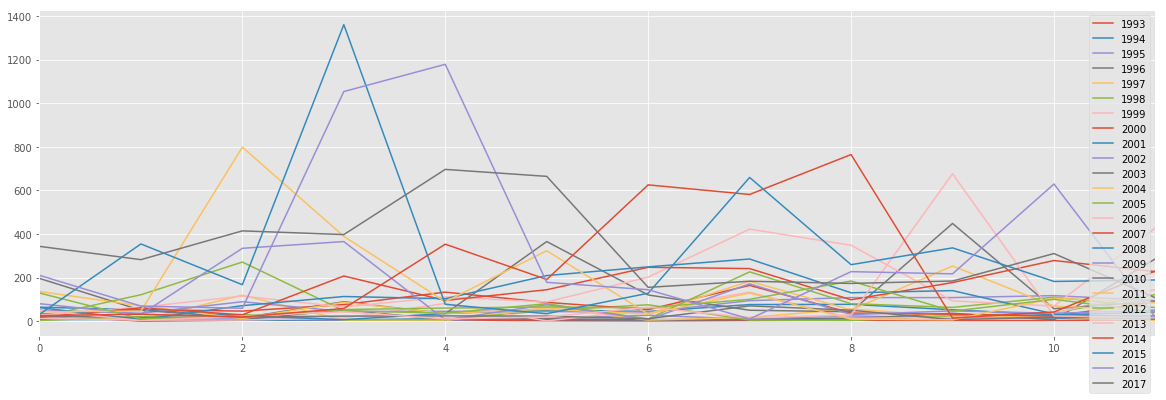

In [879]:
Annual_Deaths.plot(figsize = (20,6))
plt.show()

In [880]:
#Thinking about cutting down years, may need to focus/ narrow in my analyzation 

In [881]:
#Visualizations of different types of scaled versions of dataset

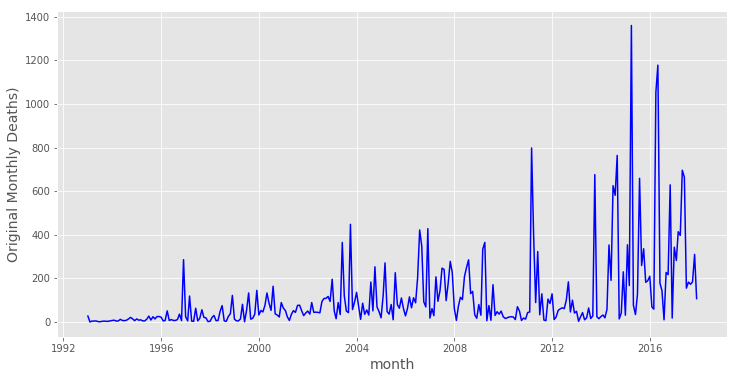

In [882]:
fig = plt.figure(figsize=(12,6))
plt.plot(MonthlyDeathsDF.number, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("Original Monthly Deaths)", fontsize=14)
plt.show()
#Original Monthly 

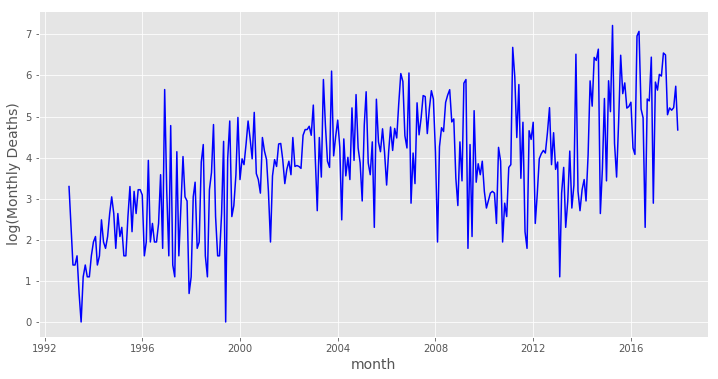

In [883]:
#LoggedDeaths
LogMSdeaths = np.log(MonthlyDeathsDF.number)
LogMSdeaths = LogMSdeaths.replace([np.inf, -np.inf], np.nan)
LogMSdeaths.dropna(inplace=True)
LogMSdeathsdf = pd.DataFrame(LogMSdeaths)
fig = plt.figure(figsize=(12,6))
plt.plot(LogMSdeaths, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(Monthly Deaths)", fontsize=14)
plt.show()
#Log Transformation to help with nonstationarity dataset my making it more linear, without NaNs since dropped 

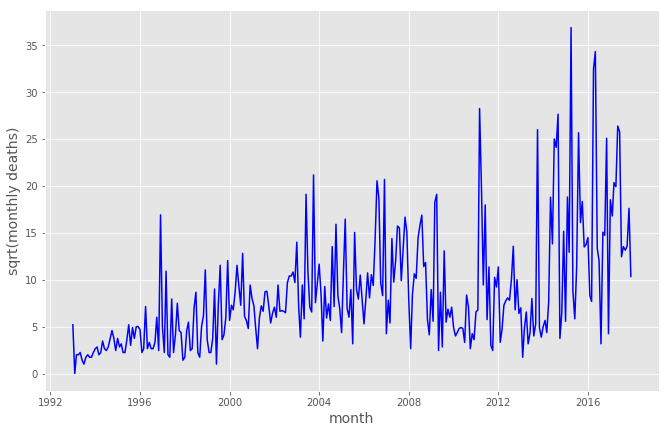

In [884]:
#SqrtDeaths
SqrtMSdeaths = np.sqrt(MonthlyDeathsDF.number)
SqrtMSdeaths.dropna(inplace=True)
SqrtMSdeathsdf = pd.DataFrame(SqrtMSdeaths)
fig = plt.figure(figsize=(11,7))
plt.plot(SqrtMSdeaths, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("sqrt(monthly deaths)", fontsize=14)
plt.show()
#Checking out how SqRt does, without NaNs since dropped 

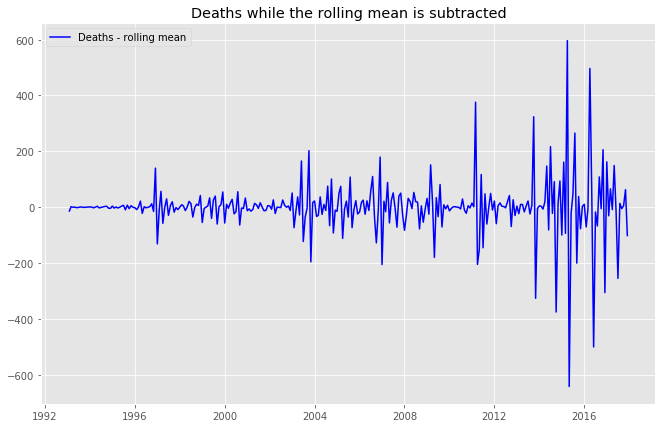

In [885]:
#Subtracted Rolling Mean
#Can Adjust window size 
#Dropped Nans, and Plotting 
rolmean = MonthlyDeathsDF.number.rolling(window = 2).mean()
data_minus_rolmean = MonthlyDeathsDF.number - rolmean
data_minus_rolmean.dropna(inplace=True)
SubRollMeanDeathsdf = pd.DataFrame(data_minus_rolmean)
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_rolmean, color='blue',label='Deaths - rolling mean')
plt.legend(loc='best')
plt.title('Deaths while the rolling mean is subtracted')
plt.show(block=False)

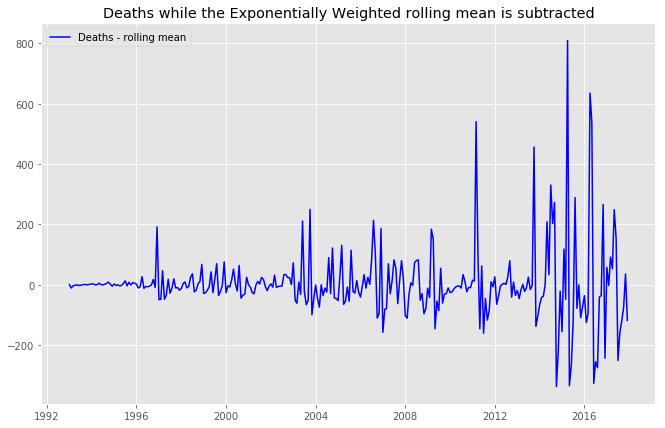

In [886]:
#Subtracted Weighted Rolling Mean
#Avoids defining window size but must choosen assigning weights method
#Choosing Exponential decay since it proved to be more appropriate for my dataset 
#Dropped NaNs and Plotted 
exp_rolmean = MonthlyDeathsDF.number.ewm(halflife = 2).mean()
data_minus_exp_rolmean = MonthlyDeathsDF.number - exp_rolmean
data_minus_exp_rolmean.dropna(inplace=True)
SubWeightedExpRollMeanDeathsdf = pd.DataFrame(data_minus_exp_rolmean)
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_rolmean, color='blue',label='Deaths - rolling mean')
plt.legend(loc='best')
plt.title('Deaths while the Exponentially Weighted rolling mean is subtracted')
plt.show(block=False)

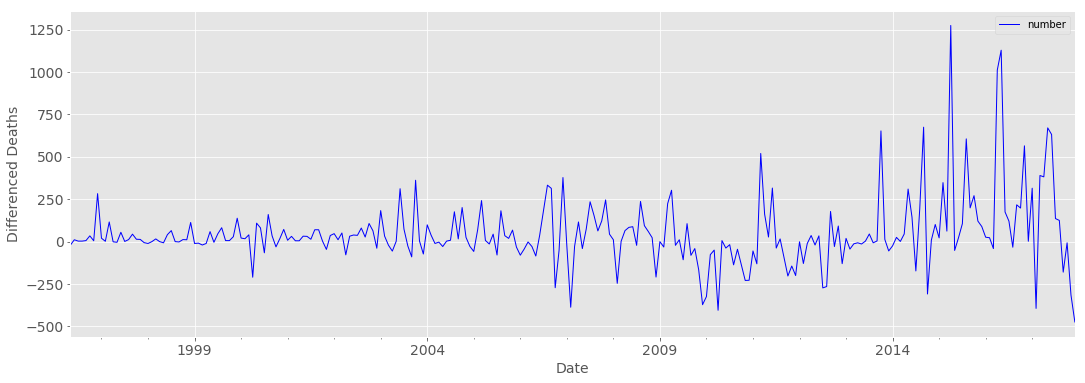

In [887]:
#Differenced Deaths with 40 periods 
data_diff = MonthlyDeathsDF.diff(periods=40)
data_diff.dropna(inplace=True)
DiffDeathsdf = pd.DataFrame(data_diff)
data_diff.plot(figsize=(18,6), color='blue', linewidth=1, fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Differenced Deaths', fontsize=14);
#Using differencing up around the first spike in 1996

In [888]:
#Stationarity Check function for outputting Plot with rmean and rstd deviation 
def stationarity_check(TS):    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['number']) 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None


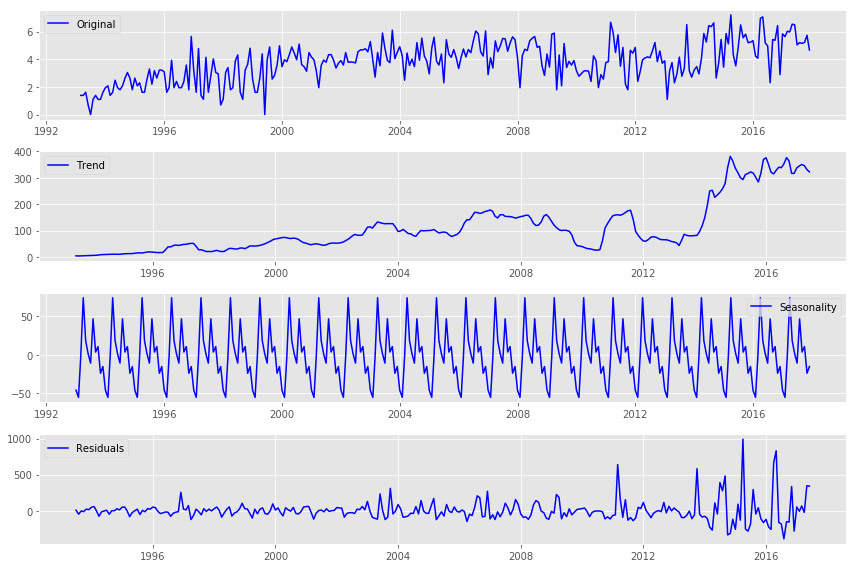

In [889]:
# import seasonal_decompose
decomposition = seasonal_decompose(MonthlyDeathsDF)

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(ts), label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

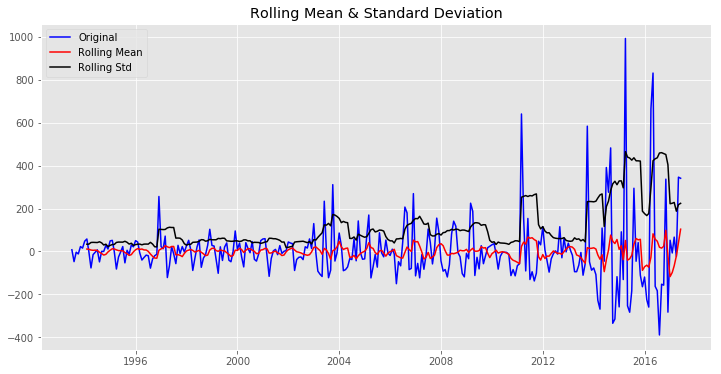

Results of Dickey-Fuller Test:
Test Statistic                -7.064308e+00
p-value                        5.127576e-10
#Lags Used                     1.500000e+01
Number of Observations Used    2.720000e+02
Critical Value (1%)           -3.454622e+00
Critical Value (5%)           -2.872225e+00
Critical Value (10%)          -2.572464e+00
dtype: float64


In [890]:
#Original Residuals Stationary Check, after statsmodels seasonal decomposition 
MonthlyDeaths_decompose = residual
MonthlyDeaths_decompose.dropna(inplace=True)
stationarity_check(MonthlyDeaths_decompose)
#After Original Decomposition, Looking at Residuals, where trend and seasonality are separated out from dataset

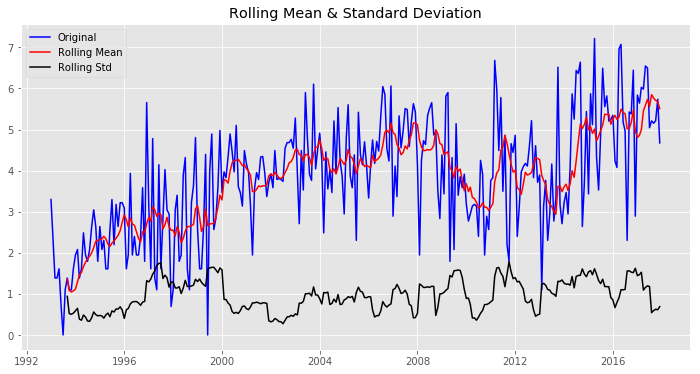

Results of Dickey-Fuller Test:
Test Statistic                  -2.524805
p-value                          0.109555
#Lags Used                       8.000000
Number of Observations Used    290.000000
Critical Value (1%)             -3.453102
Critical Value (5%)             -2.871559
Critical Value (10%)            -2.572108
dtype: float64


In [891]:
stationarity_check(LogMSdeathsdf)

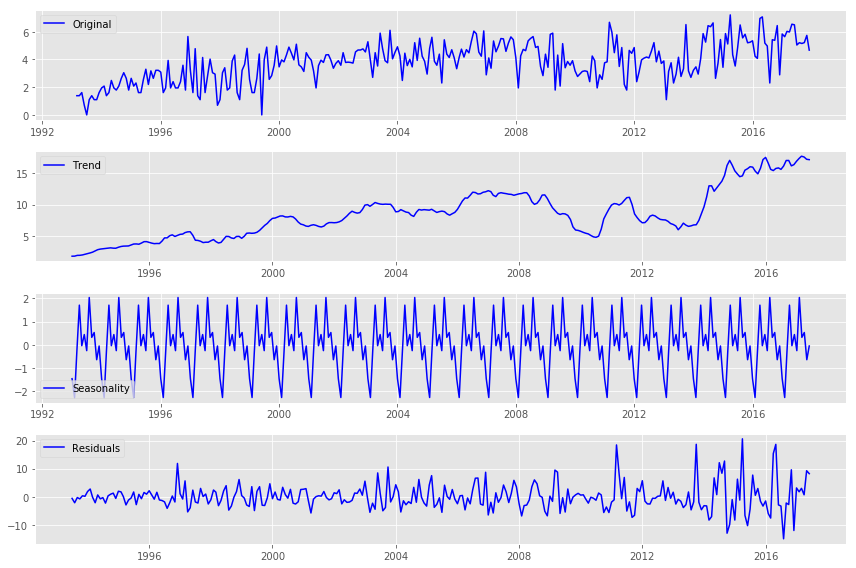

In [892]:
#Sqrt Decomposition
decomposition = seasonal_decompose(SqrtMSdeathsdf)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(ts), label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()


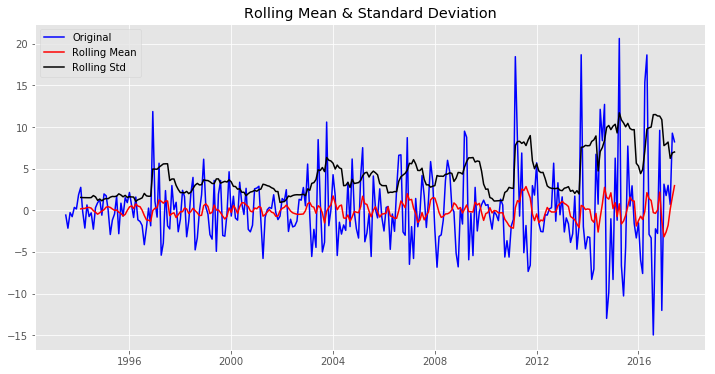

Results of Dickey-Fuller Test:
Test Statistic                -9.655310e+00
p-value                        1.399282e-16
#Lags Used                     1.100000e+01
Number of Observations Used    2.760000e+02
Critical Value (1%)           -3.454267e+00
Critical Value (5%)           -2.872070e+00
Critical Value (10%)          -2.572381e+00
dtype: float64


In [893]:
#Residual Check for SQRT deaths
SqrtMonthlyDeaths_decompose = residual
SqrtMonthlyDeaths_decompose.dropna(inplace=True)
stationarity_check(SqrtMonthlyDeaths_decompose)

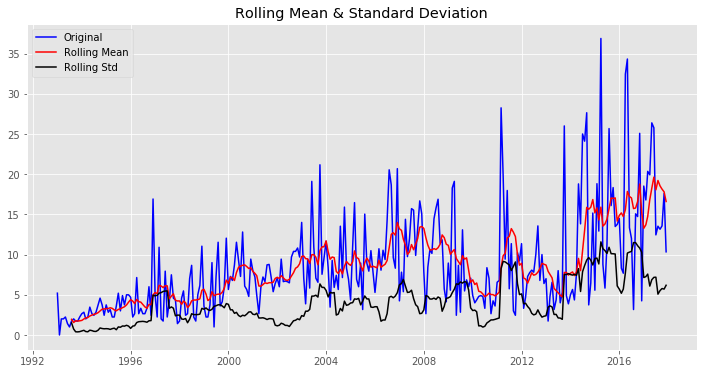

Results of Dickey-Fuller Test:
Test Statistic                  -1.379128
p-value                          0.592241
#Lags Used                      12.000000
Number of Observations Used    287.000000
Critical Value (1%)             -3.453342
Critical Value (5%)             -2.871664
Critical Value (10%)            -2.572164
dtype: float64


In [894]:
stationarity_check(SqrtMSdeathsdf)

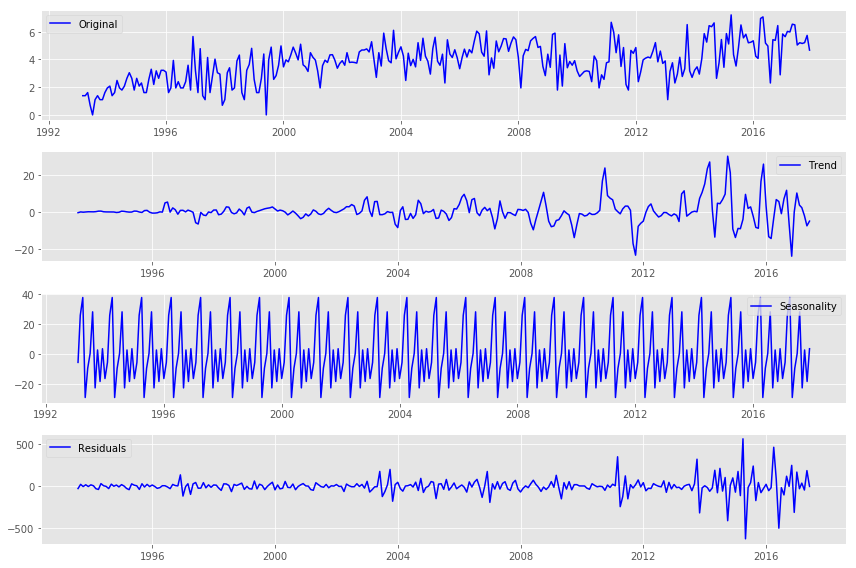

In [895]:
#SubRollMean Decomposition
decomposition = seasonal_decompose(SubRollMeanDeathsdf)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(ts), label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

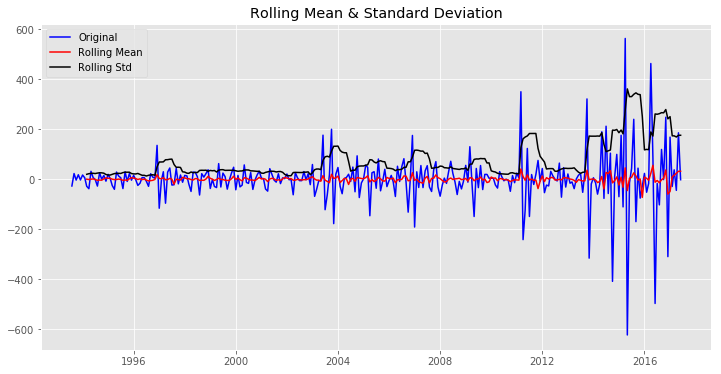

Results of Dickey-Fuller Test:
Test Statistic                -8.795589e+00
p-value                        2.180942e-14
#Lags Used                     1.600000e+01
Number of Observations Used    2.700000e+02
Critical Value (1%)           -3.454804e+00
Critical Value (5%)           -2.872305e+00
Critical Value (10%)          -2.572506e+00
dtype: float64


In [896]:
#Residual Check for SubRollMean deaths
SRollMonthlyDeaths_decompose = residual
SRollMonthlyDeaths_decompose.dropna(inplace=True)
stationarity_check(SRollMonthlyDeaths_decompose)

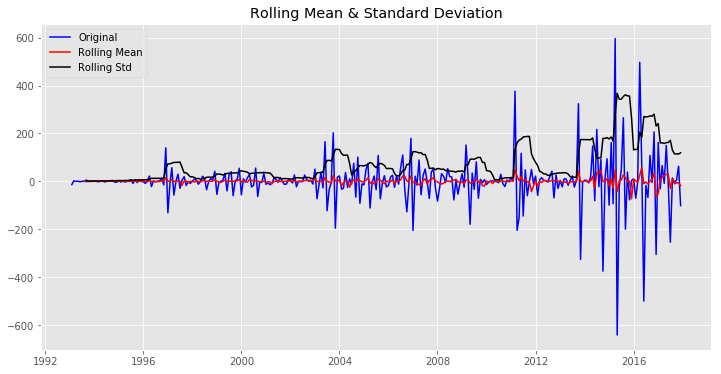

Results of Dickey-Fuller Test:
Test Statistic                -1.066056e+01
p-value                        4.418458e-19
#Lags Used                     1.100000e+01
Number of Observations Used    2.870000e+02
Critical Value (1%)           -3.453342e+00
Critical Value (5%)           -2.871664e+00
Critical Value (10%)          -2.572164e+00
dtype: float64


In [897]:
stationarity_check(SubRollMeanDeathsdf)
#Seems to outperform statsmodels residuals from decomposition, and its own 
#Most Stationary of them all

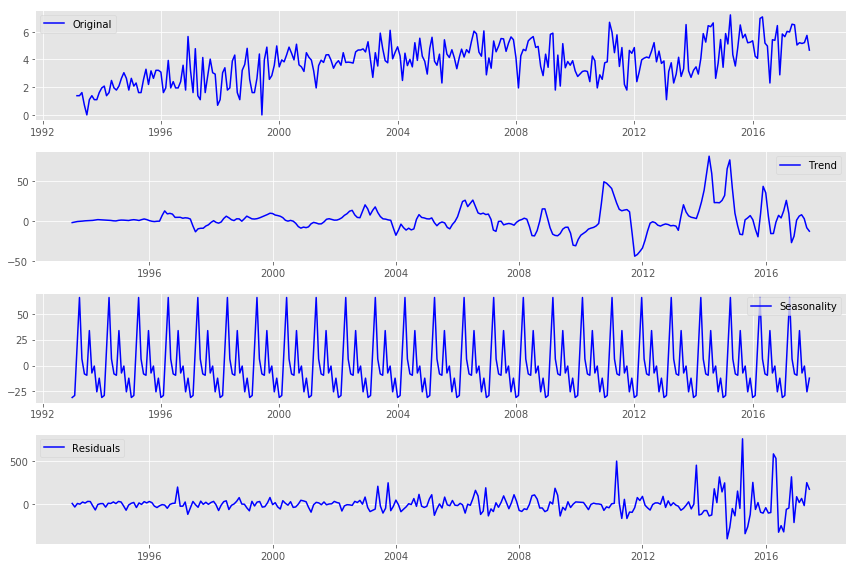

In [898]:
#SubWeightedExpRollMean Decomposition
decomposition = seasonal_decompose(SubWeightedExpRollMeanDeathsdf)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(ts), label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

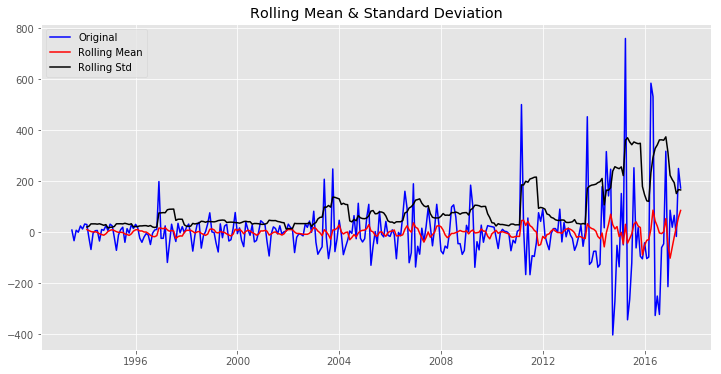

Results of Dickey-Fuller Test:
Test Statistic                -7.764254e+00
p-value                        9.278517e-12
#Lags Used                     1.600000e+01
Number of Observations Used    2.710000e+02
Critical Value (1%)           -3.454713e+00
Critical Value (5%)           -2.872265e+00
Critical Value (10%)          -2.572485e+00
dtype: float64


In [899]:
#Residual Check for SubWeightedExpRollMean deaths, improved itself when focusing on residuals
SWERM_MonthlyDeaths_decompose = residual
SWERM_MonthlyDeaths_decompose.dropna(inplace=True)
stationarity_check(SWERM_MonthlyDeaths_decompose)

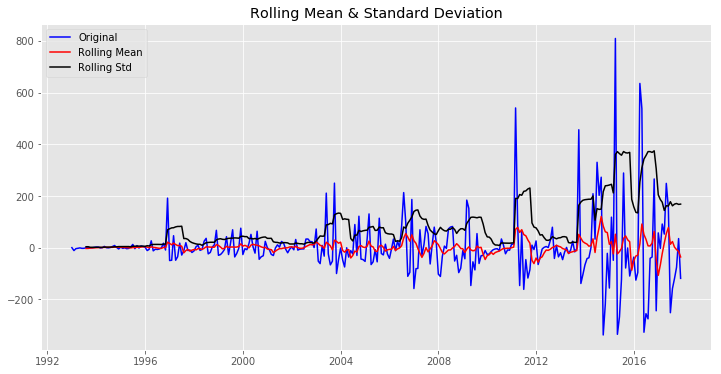

Results of Dickey-Fuller Test:
Test Statistic                  -5.256707
p-value                          0.000007
#Lags Used                      12.000000
Number of Observations Used    287.000000
Critical Value (1%)             -3.453342
Critical Value (5%)             -2.871664
Critical Value (10%)            -2.572164
dtype: float64


In [900]:
stationarity_check(SubWeightedExpRollMeanDeathsdf)

In [901]:
#Searching for best Detrended ACF and PACF

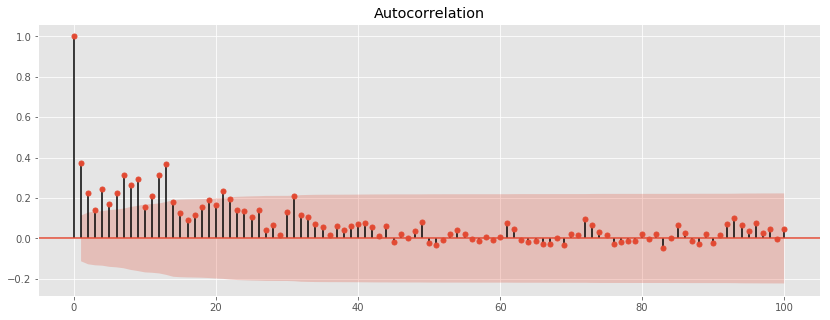

In [902]:
rcParams['figure.figsize'] = 14, 5
plot_acf(MonthlyDeathsDF, lags = 100);

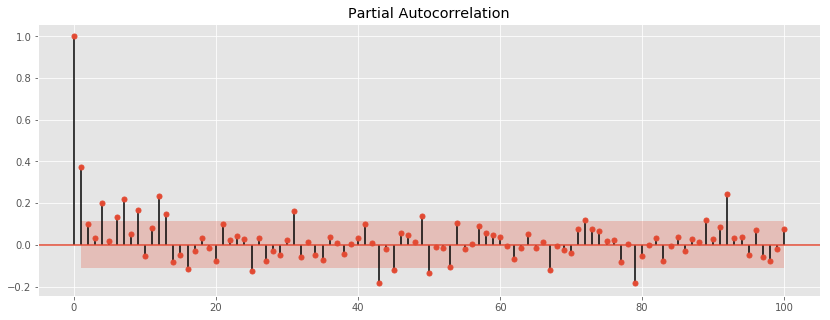

In [903]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(MonthlyDeathsDF, lags = 100);

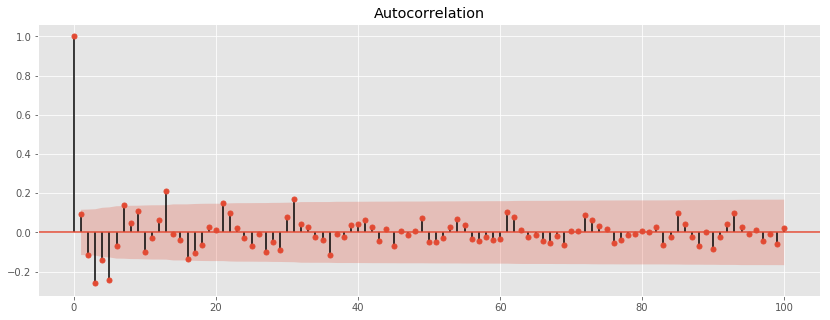

In [904]:
rcParams['figure.figsize'] = 14, 5
plot_acf(MonthlyDeaths_decompose, lags = 100);
#13 lags seems to be highest correlation

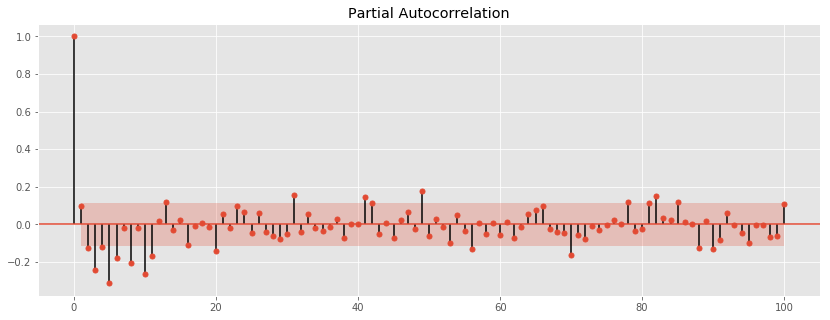

In [905]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(MonthlyDeaths_decompose, lags = 100);
#Around 4 seems to be best

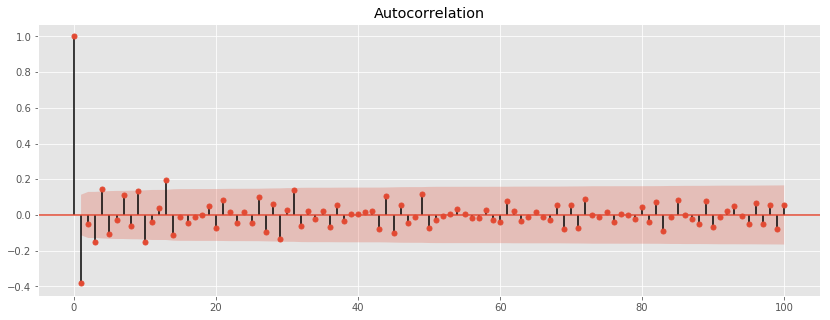

In [906]:
rcParams['figure.figsize'] = 14, 5
plot_acf(SubRollMeanDeathsdf, lags = 100);

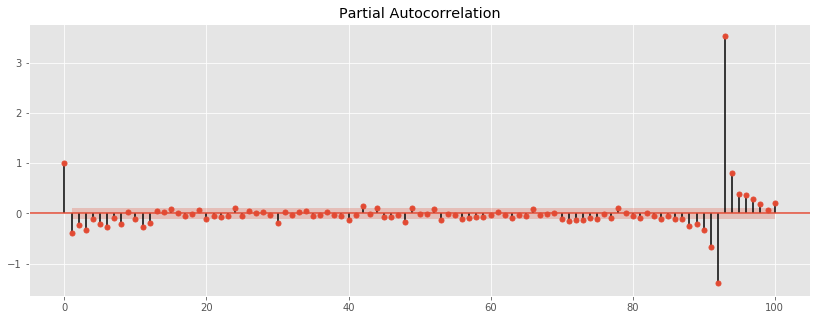

In [907]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(SubRollMeanDeathsdf, lags = 100);
#Curious about those high values around the 90 lags

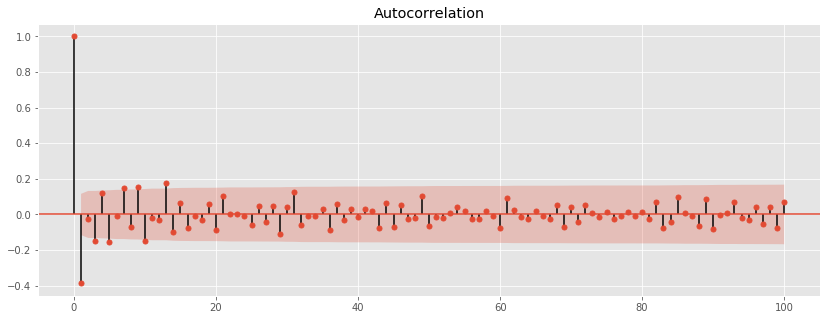

In [908]:
rcParams['figure.figsize'] = 14, 5
plot_acf(SRollMonthlyDeaths_decompose, lags = 100);

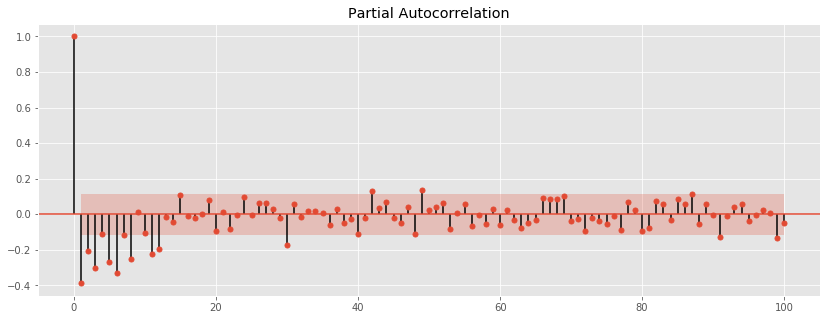

In [909]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(SRollMonthlyDeaths_decompose, lags = 100);

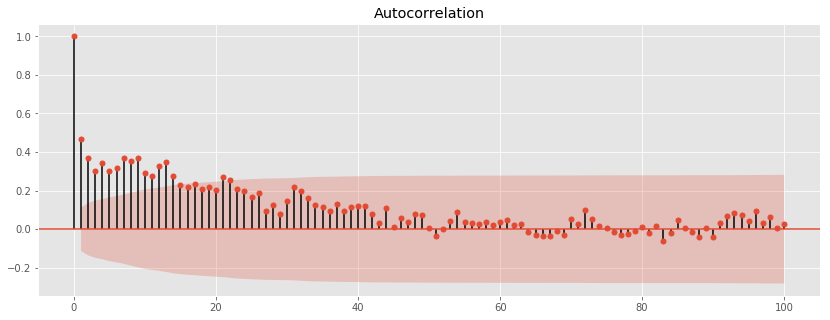

In [910]:
rcParams['figure.figsize'] = 14, 5
plot_acf(SqrtMSdeathsdf, lags = 100);

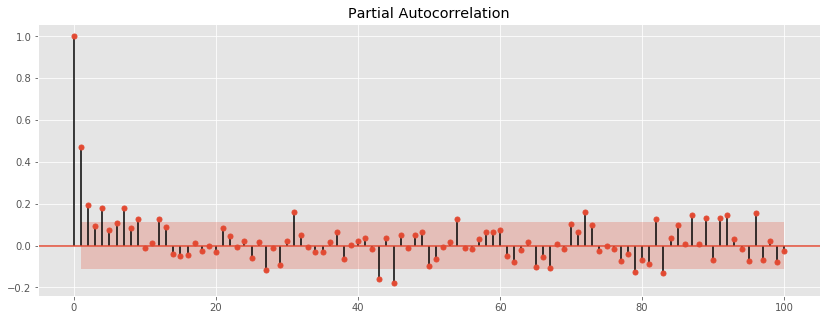

In [911]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(SqrtMSdeathsdf, lags = 100);

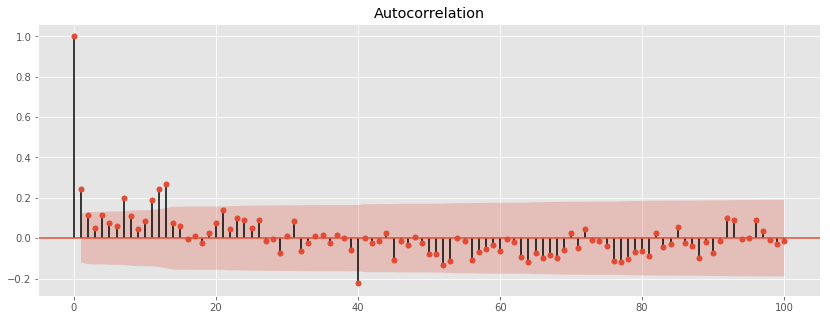

In [912]:
#DiffDeaths from the first 40 periods in dataset 
rcParams['figure.figsize'] = 14, 5
plot_acf(DiffDeathsdf, lags = 100);

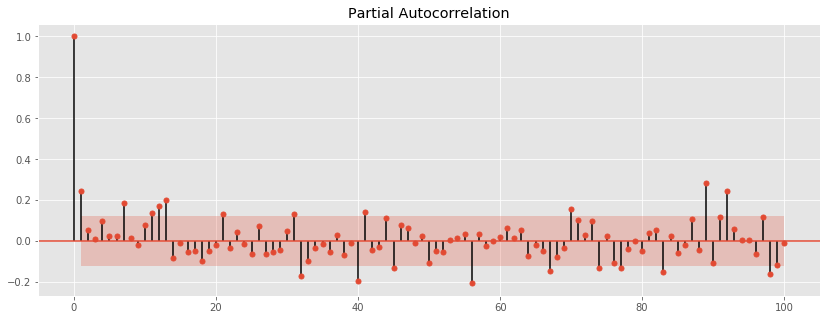

In [913]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(DiffDeathsdf, lags = 100);

In [914]:
# Fit an ARMA(13,1) model to the DiffDeathsdf data
mod_arma = ARMA(DiffDeathsdf, order=(1,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)
#Possibly the best performer

                              ARMA Model Results                              
Dep. Variable:                 number   No. Observations:                  260
Model:                     ARMA(1, 1)   Log Likelihood               -1740.559
Method:                       css-mle   S.D. of innovations            195.395
Date:                Thu, 25 Jul 2019   AIC                           3489.118
Time:                        15:32:40   BIC                           3503.360
Sample:                    05-01-1996   HQIC                          3494.843
                         - 12-01-2017                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.7240     31.445      1.454      0.147     -15.908     107.356
ar.L1.number     0.9487      0.039     24.299      0.000       0.872       1.025
ma.L1.number    -0.8614      0.065    -13.28

In [915]:
# Fit an ARMA(13,1) model to the DiffDeathsdf data
mod_arma = ARMA(MonthlyDeathsDF, order=(12,5))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)
#Possibly the best performer

                              ARMA Model Results                              
Dep. Variable:                 number   No. Observations:                  300
Model:                    ARMA(12, 5)   Log Likelihood               -1914.672
Method:                       css-mle   S.D. of innovations            142.090
Date:                Thu, 25 Jul 2019   AIC                           3867.345
Time:                        15:32:59   BIC                           3937.716
Sample:                    01-01-1993   HQIC                          3895.507
                         - 12-01-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           118.2979     47.600      2.485      0.014      25.004     211.592
ar.L1.number      1.2731      0.235      5.410      0.000       0.812       1.734
ar.L2.number     -0.8891      0.437     

In [916]:
# Fit an ARMA(3,4) model to the SqrtMonthlyDeaths_decompose data
mod_arma = ARMA(SqrtMonthlyDeaths_decompose, order=(3,4))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                 number   No. Observations:                  288
Model:                     ARMA(3, 4)   Log Likelihood                -798.255
Method:                       css-mle   S.D. of innovations              3.817
Date:                Thu, 25 Jul 2019   AIC                           1614.510
Time:                        15:33:03   BIC                           1647.477
Sample:                    07-01-1993   HQIC                          1627.721
                         - 06-01-2017                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0005      0.003     -0.170      0.865      -0.007       0.006
ar.L1.number     0.3999      0.073      5.493      0.000       0.257       0.543
ar.L2.number     0.6576      0.059     11.17

In [323]:
# Fit an ARMA(3,3) model to the SRollMonthlyDeaths_decompose data
mod_arma = ARMA(SRollMonthlyDeaths_decompose, order=(3,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                 number   No. Observations:                  285
Model:                     ARMA(3, 1)   Log Likelihood               -1732.101
Method:                       css-mle   S.D. of innovations            104.307
Date:                Wed, 24 Jul 2019   AIC                           3476.203
Time:                        12:20:44   BIC                           3498.118
Sample:                    10-01-1993   HQIC                          3484.988
                         - 06-01-2017                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0270      0.086      0.313      0.754      -0.142       0.196
ar.L1.number     0.6351      0.057     11.146      0.000       0.523       0.747
ar.L2.number    -0.2168      0.067     -3.24

In [917]:
# Fit an ARMA(3,1) model to the SubRollMeanDeathsdf data
mod_arma = ARMA(SubRollMeanDeathsdf, order=(3,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                 number   No. Observations:                  299
Model:                     ARMA(3, 1)   Log Likelihood               -1724.021
Method:                       css-mle   S.D. of innovations             76.980
Date:                Thu, 25 Jul 2019   AIC                           3460.042
Time:                        15:33:12   BIC                           3482.245
Sample:                    02-01-1993   HQIC                          3468.929
                         - 12-01-2017                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5346      0.333      1.603      0.110      -0.119       1.188
ar.L1.number     0.1427      0.062      2.297      0.022       0.021       0.264
ar.L2.number    -0.0488      0.060     -0.81

In [325]:
#OriginalDF decomposed Gridsearch
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets, s=12 months in a year
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [326]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(MonthlyDeaths_decompose,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =3686.6008173918935
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =3544.5379602938856
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =3701.0810208543
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =3428.4972911367527
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =3556.337679921482
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =3546.463062089415
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =3499.468885712962
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =3430.496231446966
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =3673.349935779908
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =3532.070094145431
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =3690.5848881301454
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =3416.5428370687705
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =3555.850529161375
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =3534.0126953037443
ARIMA (0, 0, 1) 

In [327]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 0, 1)
pdqs    (1, 1, 1, 12)
aic           3371.55
Name: 47, dtype: object

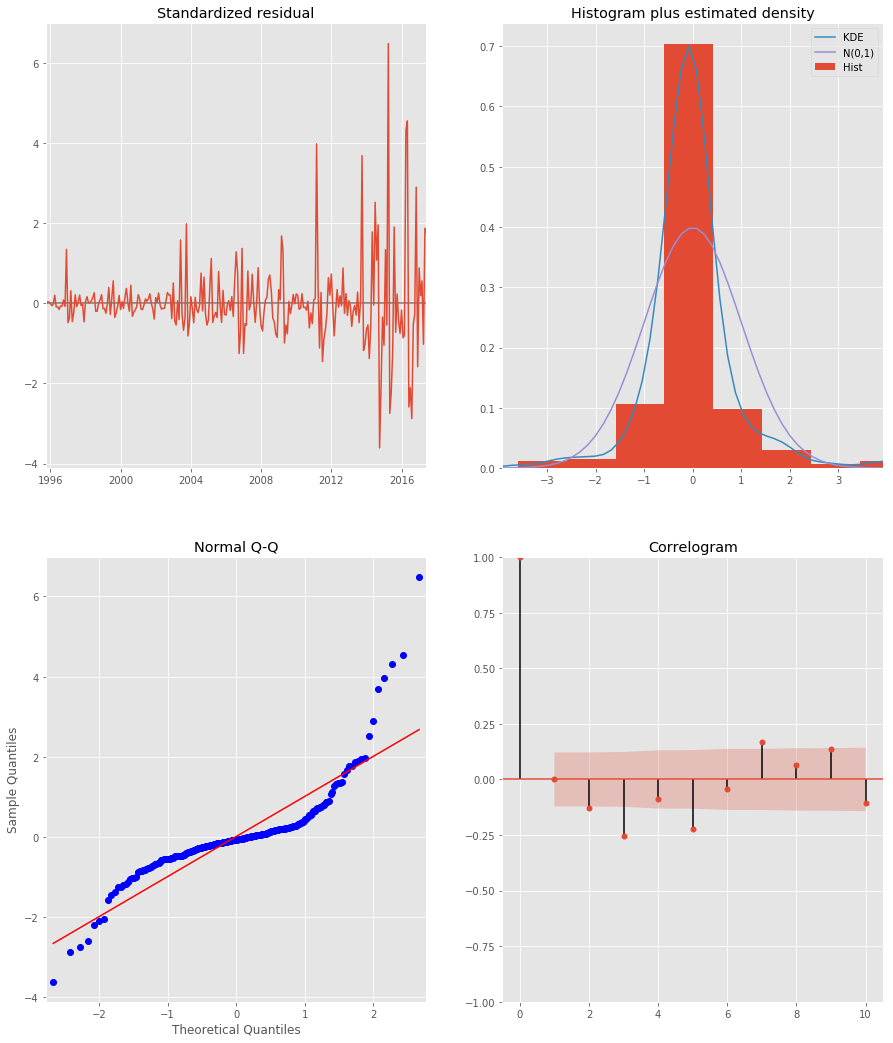

In [335]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [441]:
#SRoll GridSearch
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets, s=12 months in a year
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [442]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(SubRollMeanDeathsdf,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =3589.8213643244476
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =3458.737925970674
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =3637.9942713548617
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =3344.5251307151375
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =3469.7837335434497
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =3460.7029963911755
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =3423.233922974511
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =3346.4372616862247
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =3447.320817145478
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =3315.679445057237
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =3452.2413200109477
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =3203.099870426667
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =3336.566370958343
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =3317.332752725535
ARIMA (0, 0, 

In [443]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 0, 1)
pdqs    (0, 1, 1, 12)
aic           3200.64
Name: 43, dtype: object

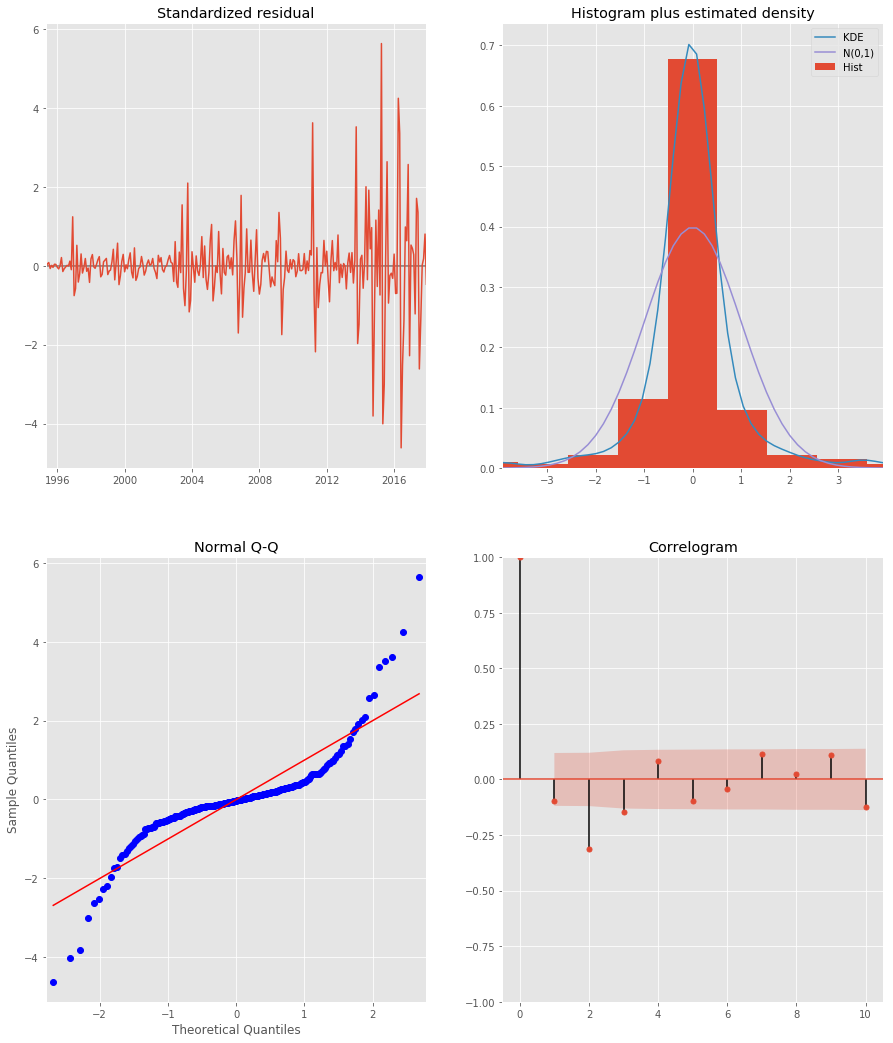

In [444]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [333]:
#SWERM GridSearch
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets, s=12 months in a year
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [334]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(SWERM_MonthlyDeaths_decompose,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =3548.250682839006
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =3412.7689430938008
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =3576.5326059320887
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =3303.0677334447732
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =3424.126861360712
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =3414.7246780288106
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =3377.2220177331865
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =3305.0214428469053
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =3538.382648339776
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =3402.999429669223
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =3564.9360516970673
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =3293.404294266643
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =3425.8382164120267
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =3404.9559908401898
ARIMA (0, 0

In [336]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 0, 1)
pdqs    (0, 1, 1, 12)
aic           3234.16
Name: 43, dtype: object

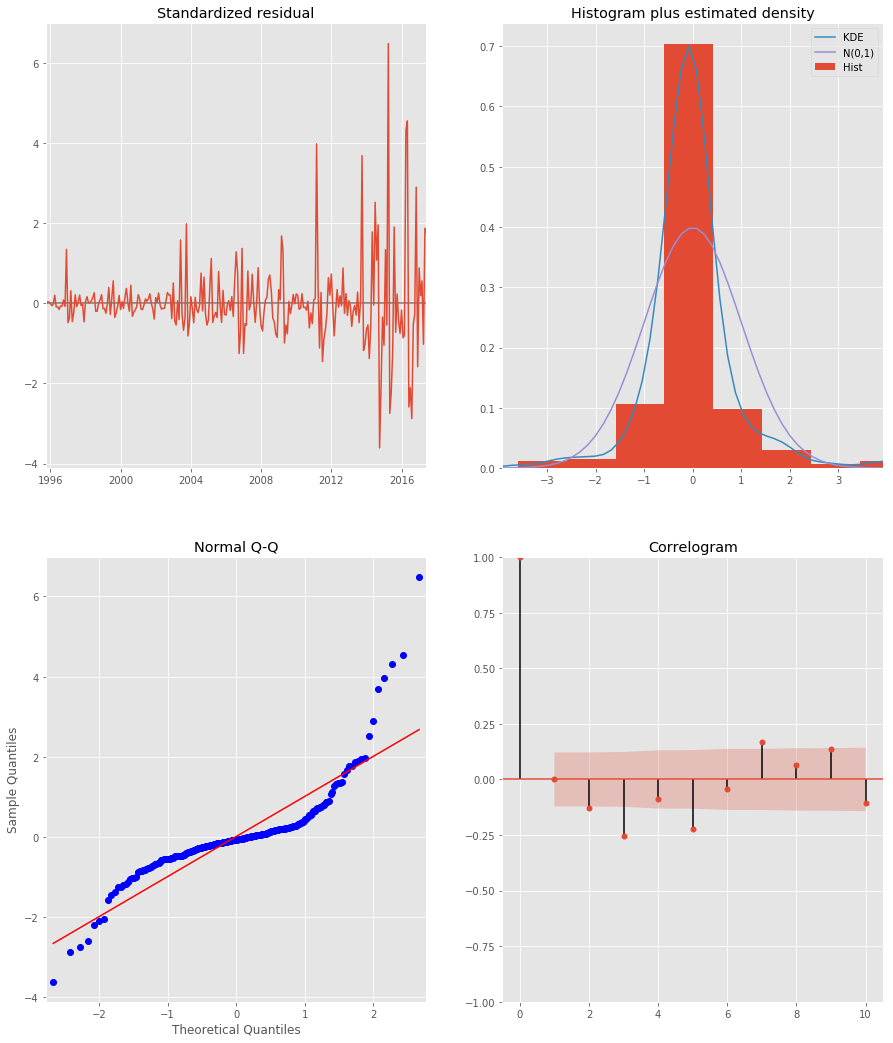

In [337]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [338]:
#SQRT Gridsearch
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets, s=12 months in a year
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [339]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(SqrtMSdeathsdf,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =2259.61024529549
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =2057.6716831224066
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =1926.050439624708
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =1766.598520862708
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =1915.967129802841
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =1822.1832314055323
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =1801.8686006274938
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =1768.597259861534
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =2100.4422503690575
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =1972.459857480959
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =1915.8843405734356
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =1743.9735187671959
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =1901.9618279972472
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =1802.5352094173118
ARIMA (0, 0, 

In [340]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic           1706.95
Name: 59, dtype: object

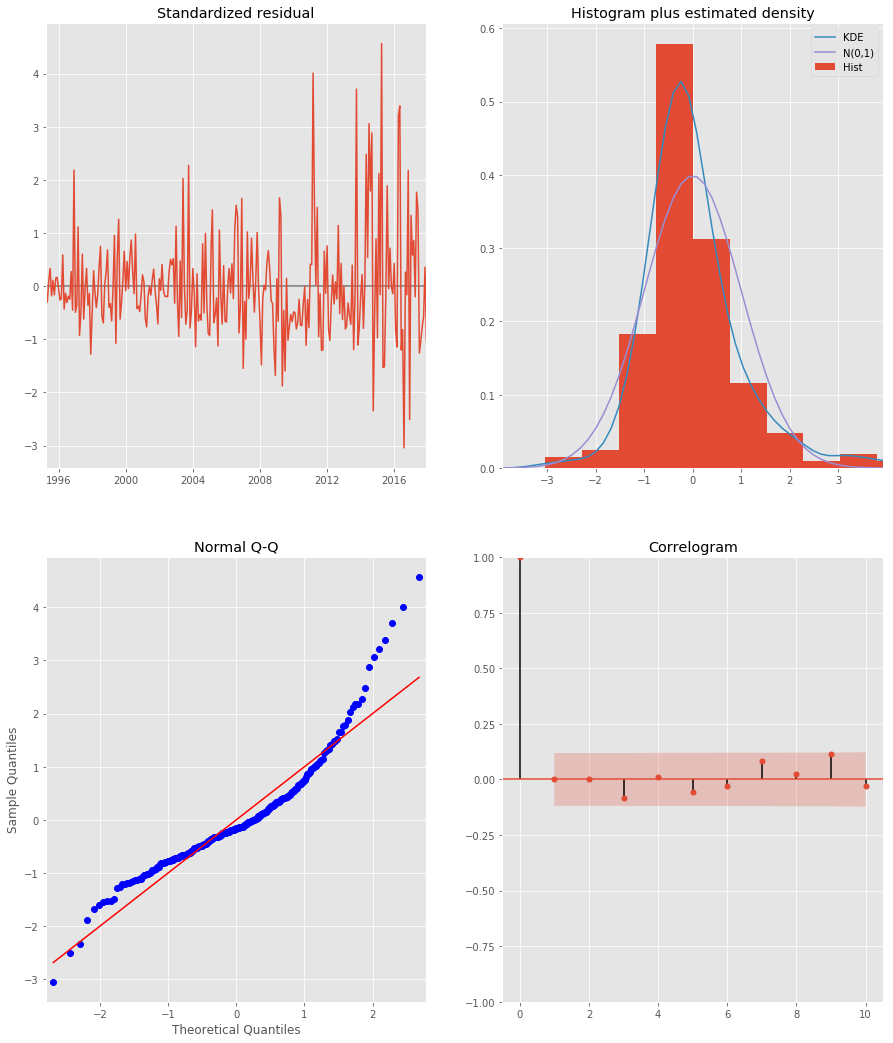

In [341]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()
#SqrtMonthlyDeaths_ Seems to give Lowest AIC out of all other datasets, closest residuals are to being uncorrelated

In [537]:
#Originaldf Gridsearch
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets, s=12 months in a year
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [538]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(MonthlyDeathsDF,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =4046.861961938169
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =3842.655996584397
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =3866.953271530232
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =3628.2245181640083
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =3820.493204506438
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =3773.978609066826
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =3673.85752033665
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =3629.578720677152
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =3969.2695706951363
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =3799.883740452034
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =3855.485984456504
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =3606.4037057910655
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =3807.7278416188637
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =3755.0710940116032
ARIMA (0, 0, 1) 

In [539]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic           3578.65
Name: 59, dtype: object

In [924]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(MonthlyDeathsDF,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1369      0.041      3.353      0.001       0.057       0.217
ma.L1         -1.0557      0.019    -56.668      0.000      -1.092      -1.019
ma.S.L12      -0.8680      0.030    -28.496      0.000      -0.928      -0.808
sigma2      2.416e+04   1431.746     16.873      0.000    2.14e+04     2.7e+04


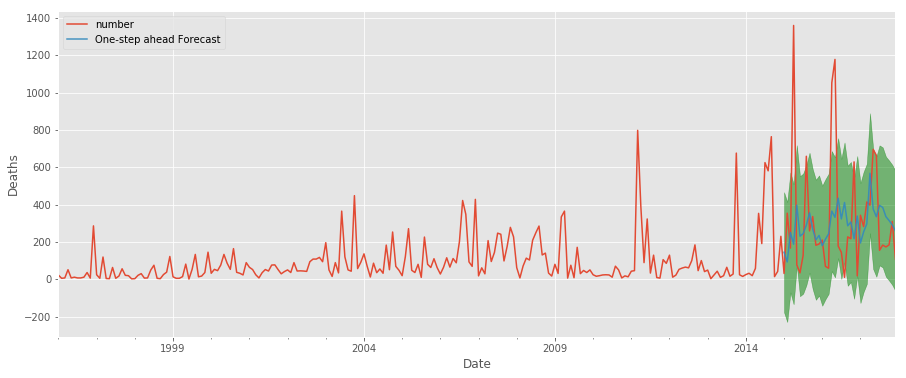

In [925]:
pred = output.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_conf = pred.conf_int()
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = MonthlyDeathsDF['1996':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Deaths')
plt.legend()

plt.show()

#Predictions MonthlyDeathsDF with SARIMA of GridSearch Results


In [935]:
 MonthlyDeathsDF['2015':].index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='found dead', freq='MS')

In [939]:
list(pred.predicted_mean)

[144.67422890853797,
 92.64065932047339,
 250.57938404628848,
 187.57137400319795,
 396.55489245656145,
 230.68015859066935,
 244.39569109311415,
 289.79943486113325,
 356.0153123211117,
 268.7508609697884,
 211.47949820943745,
 234.6379224678376,
 179.73059946768024,
 214.33993691896455,
 243.40566966144954,
 365.0695388493218,
 331.7802971972592,
 434.27514317413215,
 323.1140619964183,
 411.1886535359092,
 286.50984662789784,
 306.75644191082256,
 216.94110840694307,
 338.54731964804694,
 194.2664598509645,
 253.72068638913944,
 296.7282918940907,
 567.9356057994262,
 376.63598670410556,
 335.1045138732792,
 395.774142127866,
 384.9350003401234,
 335.374128517984,
 314.6989573116972,
 291.38239022313866,
 258.98207106968164]

In [941]:
ForecastDf = pd.DataFrame(index =  MonthlyDeathsDF['2015':].index)
ForecastDf['Real'] = MonthlyDeathsDF['2015':]
ForecastDf['OrigMonthlypred'] = list(pred.predicted_mean)

In [943]:
#SubRollMeanDeathsdf SARIMAX with p,q as 3,1 as shown for ACF PACF rather than grid
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(SubRollMeanDeathsdf,
                                order=(3, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1099      0.041      2.652      0.008       0.029       0.191
ar.L2         -0.0447      0.047     -0.943      0.346      -0.138       0.048
ar.L3         -0.1457      0.053     -2.774      0.006      -0.249      -0.043
ma.L1         -0.9179      0.023    -40.292      0.000      -0.963      -0.873
ma.S.L12      -0.8703      0.031    -27.823      0.000      -0.932      -0.809
sigma2      6600.8195    249.639     26.441      0.000    6111.536    7090.103


In [944]:
output.aic

3199.070153366735

In [945]:
ForecastDf['SRollMeanPred'] = output.predict(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred = output.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_conf = pred.conf_int()

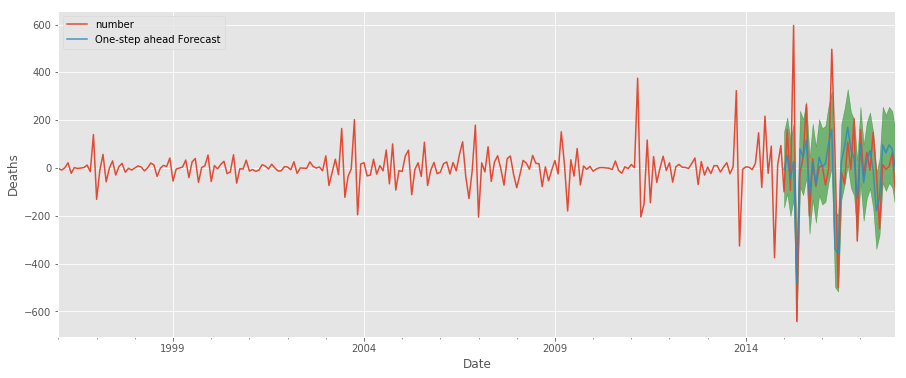

In [946]:
#SubRollMeanDeathsdf Predictions
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = SubRollMeanDeathsdf['1996':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Deaths')
plt.legend()

plt.show()

In [947]:
rolmean = MonthlyDeathsDF.number.rolling(window = 2).mean()
rolmean.dropna(inplace=True)
a = rolmean[-36:]

ForecastDf.SRollMeanPred = pred.predicted_mean + a 
ForecastDf
#Adding back the subtracted rolling mean to SRollMeanPred

Real  OrigMonthlypred  SRollMeanPred
found dead                                        
2015-01-01    31.0       144.674229     124.251264
2015-02-01   354.0        92.640659     244.849107
2015-03-01   167.0       250.579384     218.676112
2015-04-01  1360.0       187.571374     790.445885
2015-05-01    77.0       396.554892     233.826008
2015-06-01    34.0       230.680159     135.714245
2015-07-01   128.0       244.395691     126.737558
2015-08-01   659.0       289.799435     511.074827
2015-09-01   259.0       356.015312     343.178333
2015-10-01   336.0       268.750861     323.977384
2015-11-01   182.0       211.479498     189.337010
2015-12-01   189.0       234.637922     230.893540
2016-01-01   210.0       179.730599     206.143525
2016-02-01    69.0       214.339937     157.478476
2016-03-01    59.0       243.405670     166.587873
2016-04-01  1053.0       365.069539     718.637175
2016-05-01  1178.0       331.780297     777.186343
2016-06-01   178.0       434.275143     320.752998
2016-07-01   144.0       323.114062     187.151853
2016-08-01    10.0       411.188654     166.214698
2016-09-01   227.0       286.509847     289.303164
2016-10-01   217.0       306.756442     298.116373
2016-11-01   629.0       216.941108     466.318887
2016-12-01    18.0       338.547320     196.329804
2017-01-01   343.0       194.266460     277.618151
2017-02-01   282.0       253.720686     251.307767
2017-03-01   414.0       296.728292     380.401405
2017-04-01   397.0       567.935606     478.721554
2017-05-01   696.0       376.635987     537.772879
2017-06-01   664.0       335.104514     500.860396
2017-07-01   155.0       395.774142     289.251416
2017-08-01   183.0       384.935000     266.248445
2017-09-01   173.0       335.374129     241.354025
2017-10-01   184.0       314.698957     275.580517
2017-11-01   310.0       291.382390     325.181671
2017-12-01   107.0       258.982071     202.358319

In [948]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(SqrtMSdeathsdf,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1501      0.053      2.809      0.005       0.045       0.255
ma.L1         -0.9268      0.021    -45.138      0.000      -0.967      -0.887
ma.S.L12      -0.9084      0.043    -21.272      0.000      -0.992      -0.825
sigma2        28.0152      1.478     18.949      0.000      25.117      30.913


In [949]:
ForecastDf['SQRTpred'] = output.predict(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred = output.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_conf = pred.conf_int()

In [950]:
#Squaring back values that were rooted previously
ForecastDf.SQRTpred = ForecastDf.SQRTpred**2

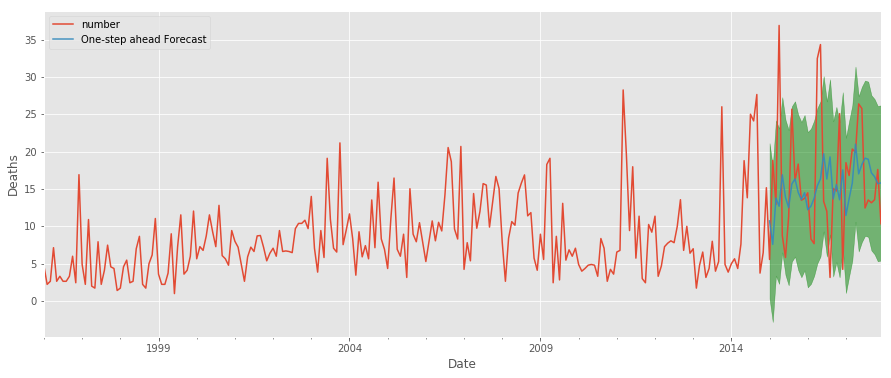

In [951]:
#SqrtMSdeathsdf Predictions
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = SqrtMSdeathsdf['1996':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Deaths')
plt.legend()

plt.show()

In [997]:
#Dynamic run of Sroll
#SubRollMeanDeathsdf SARIMAX with p,q as 3,1 as shown for ACF PACF rather than grid
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(SubRollMeanDeathsdf,
                                order=(3, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1099      0.041      2.652      0.008       0.029       0.191
ar.L2         -0.0447      0.047     -0.943      0.346      -0.138       0.048
ar.L3         -0.1457      0.053     -2.774      0.006      -0.249      -0.043
ma.L1         -0.9179      0.023    -40.292      0.000      -0.963      -0.873
ma.S.L12      -0.8703      0.031    -27.823      0.000      -0.932      -0.809
sigma2      6600.8195    249.639     26.441      0.000    6111.536    7090.103


In [998]:
ForecastDf['Dynamic_SRollMeanPred'] = output.predict(start=pd.to_datetime('2015-01-01'), dynamic=True)
pred_dynamic = output.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=True, full_results=False)
pred_dynamic_conf = pred_dynamic.conf_int()

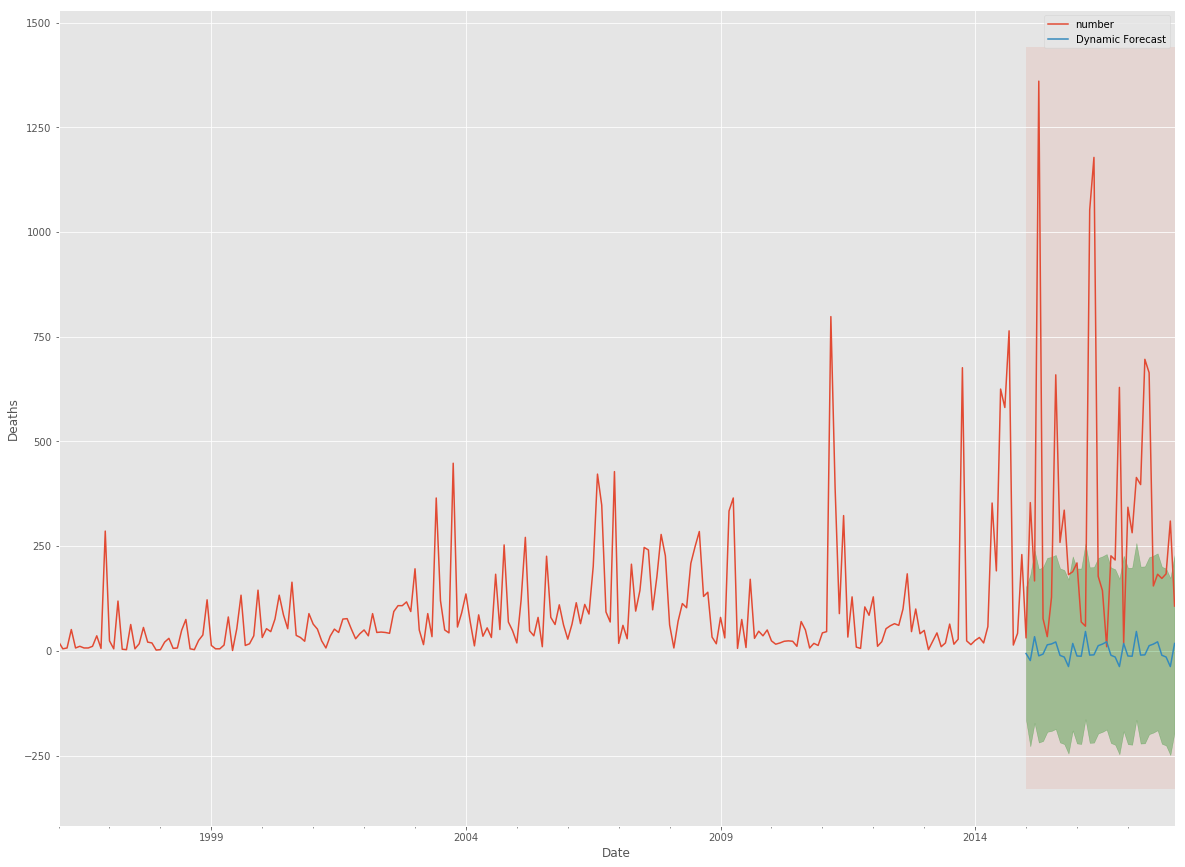

In [999]:
#SubRollMeanDeathsdf Dynamic Predictions
ax = MonthlyDeathsDF['1996':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2015-01-01'), Deaths_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Deaths')

plt.legend()
plt.show()


In [1000]:
rolmean = MonthlyDeathsDF.number.rolling(window = 2).mean()
rolmean.dropna(inplace=True)
a = rolmean.values[263:]
ForecastDf.Dynamic_SRollMeanPred = ForecastDf.Dynamic_SRollMeanPred + a 
#Re-Scaling DynamicSRoll Predictions

In [1001]:
ForecastDf

Real  OrigMonthlypred  SRollMeanPred    SQRTpred  \
found dead                                                       
2015-01-01    31.0       144.674229     124.251264  115.133918   
2015-02-01   354.0        92.640659     244.849107   57.612138   
2015-03-01   167.0       250.579384     218.676112  189.934567   
2015-04-01  1360.0       187.571374     790.445885  160.951302   
2015-05-01    77.0       396.554892     233.826008  285.373635   
2015-06-01    34.0       230.680159     135.714245  192.711491   
2015-07-01   128.0       244.395691     126.737558  156.223966   
2015-08-01   659.0       289.799435     511.074827  245.578730   
2015-09-01   259.0       356.015312     343.178333  267.113459   
2015-10-01   336.0       268.750861     323.977384  211.559972   
2015-11-01   182.0       211.479498     189.337010  184.255470   
2015-12-01   189.0       234.637922     230.893540  210.339689   
2016-01-01   210.0       179.730599     206.143525  149.347183   
2016-02-01    69.0       214.339937     157.478476  160.985013   
2016-03-01    59.0       243.405670     166.587873  189.281300   
2016-04-01  1053.0       365.069539     718.637175  237.707723   
2016-05-01  1178.0       331.780297     777.186343  267.386173   
2016-06-01   178.0       434.275143     320.752998  388.316209   
2016-07-01   144.0       323.114062     187.151853  266.610015   
2016-08-01    10.0       411.188654     166.214698  372.014963   
2016-09-01   227.0       286.509847     289.303164  186.824375   
2016-10-01   217.0       306.756442     298.116373  243.145813   
2016-11-01   629.0       216.941108     466.318887  183.815978   
2016-12-01    18.0       338.547320     196.329804  308.144865   
2017-01-01   343.0       194.266460     277.618151  131.416278   
2017-02-01   282.0       253.720686     251.307767  187.868299   
2017-03-01   414.0       296.728292     380.401405  249.807751   
2017-04-01   397.0       567.935606     478.721554  440.639795   
2017-05-01   696.0       376.635987     537.772879  289.683047   
2017-06-01   664.0       335.104514     500.860396  334.085641   
2017-07-01   155.0       395.774142     289.251416  365.610549   
2017-08-01   183.0       384.935000     266.248445  360.153071   
2017-09-01   173.0       335.374129     241.354025  294.399388   
2017-10-01   184.0       314.698957     275.580517  276.939159   
2017-11-01   310.0       291.382390     325.181671  246.753553   
2017-12-01   107.0       258.982071     202.358319  249.921770   

            Dynamic_SRollMeanPred  
found dead                         
2015-01-01             124.251264  
2015-02-01             169.496596  
2015-03-01             294.424981  
2015-04-01             751.677366  
2015-05-01             710.961813  
2015-06-01              70.064627  
2015-07-01              97.630836  
2015-08-01             414.886549  
2015-09-01             448.242991  
2015-10-01             282.849100  
2015-11-01             221.644149  
2015-12-01             203.311847  
2016-01-01             187.380056  
2016-02-01             126.745310  
2016-03-01             110.417740  
2016-04-01             545.947066  
2016-05-01            1106.103580  
2016-06-01             690.460525  
2016-07-01             177.224880  
2016-08-01              98.706920  
2016-09-01             108.103016  
2016-10-01             207.433488  
2016-11-01             385.590619  
2016-12-01             341.249718  
2017-01-01             168.363326  
2017-02-01             299.754054  
2017-03-01             394.428505  
2017-04-01             395.450296  
2017-05-01             537.102179  
2017-06-01             692.458658  
2017-07-01             425.724267  
2017-08-01             190.707140  
2017-09-01             167.603340  
2017-10-01             163.933603  
2017-11-01             209.590585  
2017-12-01             226.249662

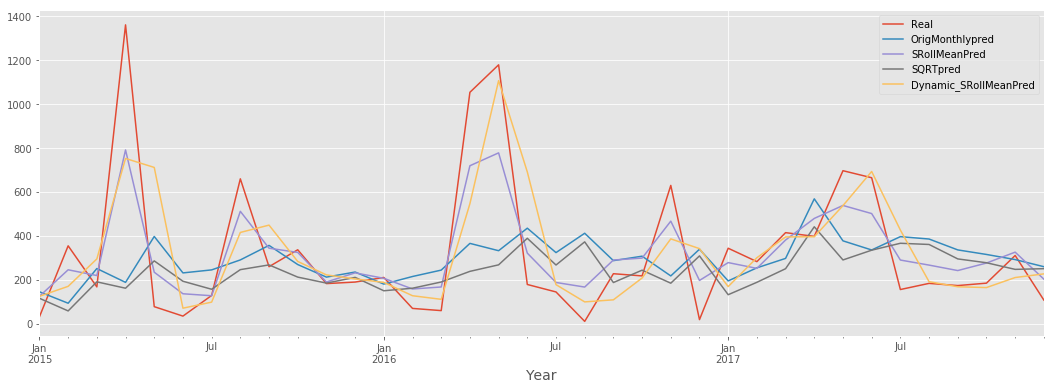

In [1002]:
ForecastDf.plot(figsize=(18,6))
plt.xlabel('Year', fontsize=14);

In [1003]:
ForecastDf.corr()

Real  OrigMonthlypred  SRollMeanPred  SQRTpred  \
Real                   1.000000         0.014122       0.965009 -0.037280   
OrigMonthlypred        0.014122         1.000000       0.242621  0.944467   
SRollMeanPred          0.965009         0.242621       1.000000  0.183008   
SQRTpred              -0.037280         0.944467       0.183008  1.000000   
Dynamic_SRollMeanPred  0.715320         0.363000       0.786418  0.339312   

                       Dynamic_SRollMeanPred  
Real                                0.715320  
OrigMonthlypred                     0.363000  
SRollMeanPred                       0.786418  
SQRTpred                            0.339312  
Dynamic_SRollMeanPred               1.000000

In [1004]:
#One-Step-Ahead
RmseSRoll = np.sqrt(((ForecastDf.SRollMeanPred - ForecastDf.Real) ** 2).mean())
print('The Root Mean Squared Error of our One-Step-Ahead forecast is {}'.format(round(RmseSRoll, 2)))


The Root Mean Squared Error of our One-Step-Ahead forecast is 160.97


In [1005]:
#Dynamic
RmseDynamicSRoll = np.sqrt(((ForecastDf.Dynamic_SRollMeanPred - ForecastDf.Real) ** 2).mean())
print('The Root Mean Squared Error of our Dynamic forecast is {}'.format(round(RmseOrig, 2)))

The Root Mean Squared Error of our Dynamic forecast is 333.35


In [1006]:
#Original
RmseOrig = np.sqrt(((ForecastDf.OrigMonthlypred - ForecastDf.Real) ** 2).mean())
print('The Root Mean Squared Error of our Original forecast is {}'.format(round(RmseOrig, 2)))

The Root Mean Squared Error of our Original forecast is 333.35


In [1007]:
#Future Predictions not in DataSet or yet to happen

In [1008]:
#Dynamic Forecast of 3 years 
# Get forecast 36 steps ahead in future
dprediction = output.get_forecast(steps=36)

# Get confidence intervals of forecasts
pred_conf = dprediction.conf_int()

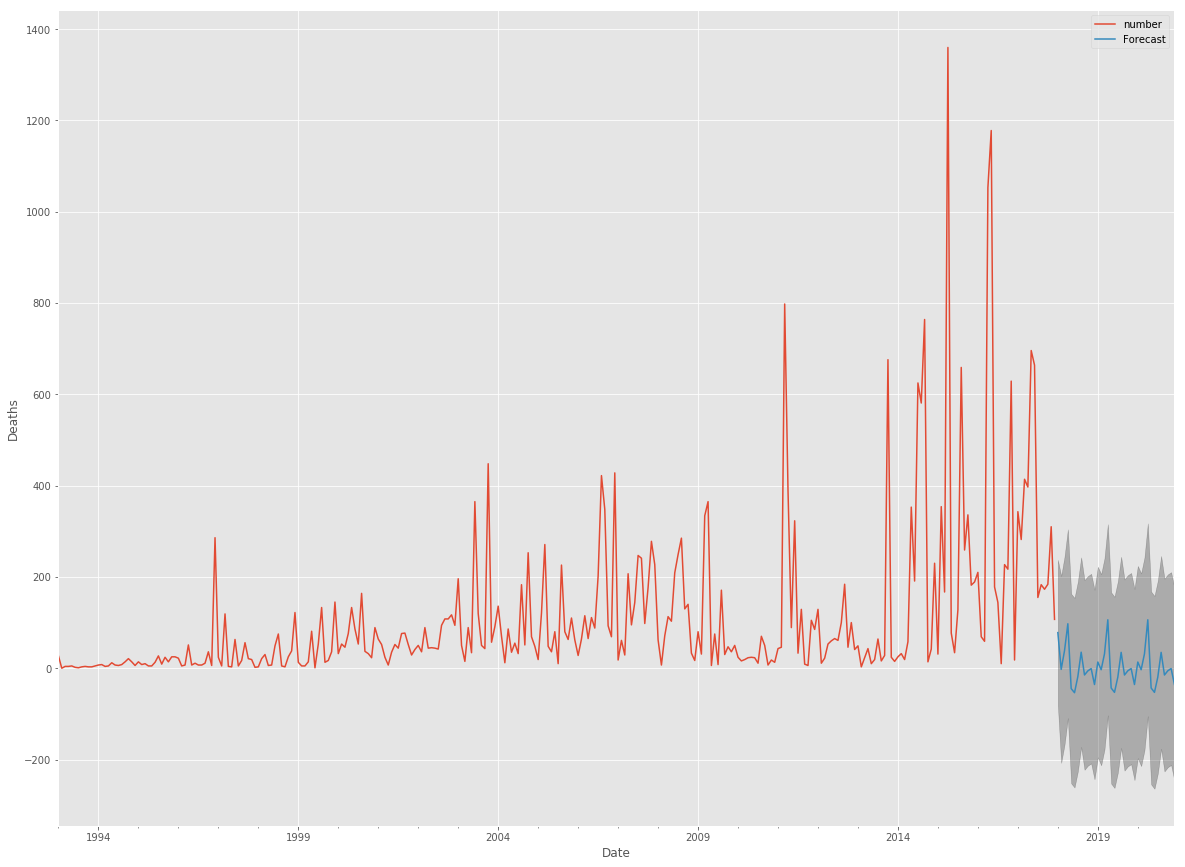

In [1009]:
ax = MonthlyDeathsDF.plot(label='observed', figsize=(20, 15))
dprediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Deaths')

plt.legend()
plt.show()

In [1010]:
#Predictions for 3 Years Down the line, with Dynamic Sroll Model
DPvalues = dprediction.predicted_mean 
DPvalues

2018-01-01     78.019009
2018-02-01     -2.555980
2018-03-01     38.396504
2018-04-01     97.464623
2018-05-01    -44.632231
2018-06-01    -53.622007
2018-07-01    -18.288815
2018-08-01     35.139952
2018-09-01    -14.777708
2018-10-01     -5.857040
2018-11-01     -0.825062
2018-12-01    -35.735292
2019-01-01     13.594929
2019-02-01     -3.274509
2019-03-01     31.615225
2019-04-01    106.141216
2019-05-01    -43.270806
2019-06-01    -52.872311
2019-07-01    -19.531932
2019-08-01     34.771408
2019-09-01    -14.871843
2019-10-01     -5.669714
2019-11-01     -0.746555
2019-12-01    -35.721329
2020-01-01     13.565649
2020-02-01     -3.289793
2020-03-01     31.612821
2020-04-01    106.145903
2020-05-01    -43.267956
2020-06-01    -52.871857
2020-07-01    -19.532693
2020-08-01     34.770888
2020-09-01    -14.871932
2020-10-01     -5.669590
2020-11-01     -0.746462
2020-12-01    -35.721311
Freq: MS, dtype: float64

In [1011]:
FutureDf = pd.DataFrame(index =  dprediction.predicted_mean.index)
FutureDf['Dynamic'] = DPvalues

In [1012]:
#Start Of One-Step-Ahead Method to get ARIMA model output to predict
#SubRollMeanDeathsdf SARIMAX with p,q as 3,1 as shown for ACF PACF rather than grid
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(SubRollMeanDeathsdf,
                                order=(3, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1099      0.041      2.652      0.008       0.029       0.191
ar.L2         -0.0447      0.047     -0.943      0.346      -0.138       0.048
ar.L3         -0.1457      0.053     -2.774      0.006      -0.249      -0.043
ma.L1         -0.9179      0.023    -40.292      0.000      -0.963      -0.873
ma.S.L12      -0.8703      0.031    -27.823      0.000      -0.932      -0.809
sigma2      6600.8195    249.639     26.441      0.000    6111.536    7090.103


In [1013]:
#Future for next 3 years 
# Get forecast 36 steps ahead in future
prediction = output.get_forecast(steps=36)
# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

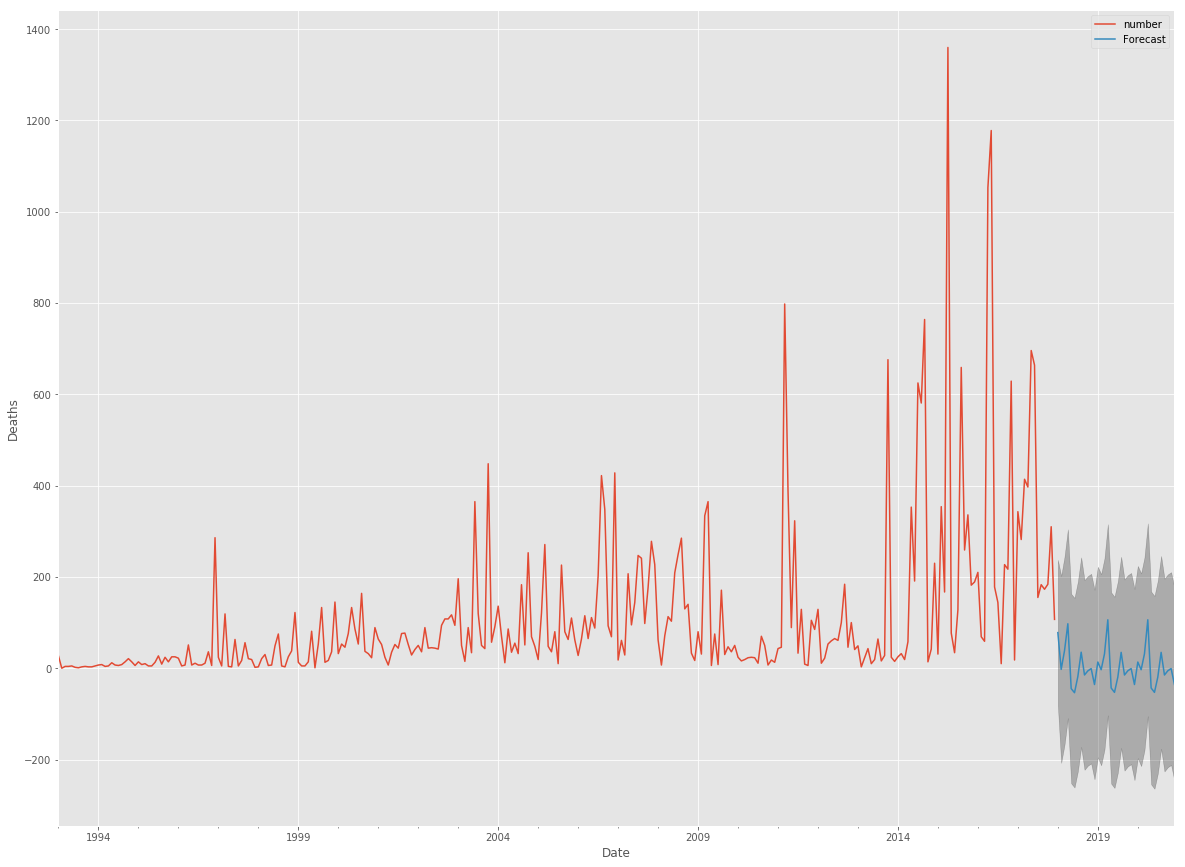

In [1014]:
ax = MonthlyDeathsDF.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Deaths')

plt.legend()
plt.show()

In [1015]:
#Predictions for 3 Years Down the line, with One-Step-Ahead Model
prediction.predicted_mean

2018-01-01     78.019009
2018-02-01     -2.555980
2018-03-01     38.396504
2018-04-01     97.464623
2018-05-01    -44.632231
2018-06-01    -53.622007
2018-07-01    -18.288815
2018-08-01     35.139952
2018-09-01    -14.777708
2018-10-01     -5.857040
2018-11-01     -0.825062
2018-12-01    -35.735292
2019-01-01     13.594929
2019-02-01     -3.274509
2019-03-01     31.615225
2019-04-01    106.141216
2019-05-01    -43.270806
2019-06-01    -52.872311
2019-07-01    -19.531932
2019-08-01     34.771408
2019-09-01    -14.871843
2019-10-01     -5.669714
2019-11-01     -0.746555
2019-12-01    -35.721329
2020-01-01     13.565649
2020-02-01     -3.289793
2020-03-01     31.612821
2020-04-01    106.145903
2020-05-01    -43.267956
2020-06-01    -52.871857
2020-07-01    -19.532693
2020-08-01     34.770888
2020-09-01    -14.871932
2020-10-01     -5.669590
2020-11-01     -0.746462
2020-12-01    -35.721311
Freq: MS, dtype: float64

In [1016]:
FutureDf['OSA'] = prediction.predicted_mean

In [1017]:
FutureDf

Dynamic         OSA
2018-01-01   78.019009   78.019009
2018-02-01   -2.555980   -2.555980
2018-03-01   38.396504   38.396504
2018-04-01   97.464623   97.464623
2018-05-01  -44.632231  -44.632231
2018-06-01  -53.622007  -53.622007
2018-07-01  -18.288815  -18.288815
2018-08-01   35.139952   35.139952
2018-09-01  -14.777708  -14.777708
2018-10-01   -5.857040   -5.857040
2018-11-01   -0.825062   -0.825062
2018-12-01  -35.735292  -35.735292
2019-01-01   13.594929   13.594929
2019-02-01   -3.274509   -3.274509
2019-03-01   31.615225   31.615225
2019-04-01  106.141216  106.141216
2019-05-01  -43.270806  -43.270806
2019-06-01  -52.872311  -52.872311
2019-07-01  -19.531932  -19.531932
2019-08-01   34.771408   34.771408
2019-09-01  -14.871843  -14.871843
2019-10-01   -5.669714   -5.669714
2019-11-01   -0.746555   -0.746555
2019-12-01  -35.721329  -35.721329
2020-01-01   13.565649   13.565649
2020-02-01   -3.289793   -3.289793
2020-03-01   31.612821   31.612821
2020-04-01  106.145903  106.145903
2020-05-01  -43.267956  -43.267956
2020-06-01  -52.871857  -52.871857
2020-07-01  -19.532693  -19.532693
2020-08-01   34.770888   34.770888
2020-09-01  -14.871932  -14.871932
2020-10-01   -5.669590   -5.669590
2020-11-01   -0.746462   -0.746462
2020-12-01  -35.721311  -35.721311

In [1149]:
#Looking at 2015 to 2019 July Migrant sea and land arrivals monthly

In [1288]:
se = r"Sea and land arrivals monthly.csv"
data= pd.read_csv(se,sep="\;",dtype=None, header = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
m o n t h                  56 non-null object
 y e a r                   55 non-null object
 i n d i v i d u a l s     55 non-null object
dtypes: object(3)
memory usage: 1.4+ KB


In [1290]:
data.head()

m o n t h    y e a r   i n d i v i d u a l s 
0         1    2 0 1 5                 6 9 1 3 
1         2    2 0 1 5                 7 9 0 0 
2         3    2 0 1 5               1 1 2 7 4 
3         4    2 0 1 5               3 1 0 6 6 
4         5    2 0 1 5               4 0 5 5 9 

In [1297]:
data.month

AttributeError: 'DataFrame' object has no attribute 'month'

In [1265]:
data['date'] = data['sep='] + "-" + data.index 
data = data[1:-1]
data.index = pd.to_datetime(data.date)

In [1266]:
data = data[['Unnamed: 1']]
data['Arrivals'] = data['Unnamed: 1']
data = data[['Arrivals']]
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 2015-01-01 to 2019-07-01
Data columns (total 1 columns):
Arrivals    55 non-null object
dtypes: object(1)
memory usage: 880.0+ bytes


In [1267]:
data

Arrivals
date                     
2015-01-01       6 9 1 3 
2015-02-01       7 9 0 0 
2015-03-01     1 1 2 7 4 
2015-04-01     3 1 0 6 6 
2015-05-01     4 0 5 5 9 
2015-06-01     5 5 6 1 3 
2015-07-01     7 9 3 8 0 
2015-08-01   1 3 1 7 8 6 
2015-09-01   1 6 4 7 7 4 
2015-10-01   2 2 2 8 0 0 
2015-11-01   1 5 6 0 2 5 
2015-12-01   1 1 9 5 0 4 
2016-01-01     7 3 6 9 1 
2016-02-01     6 1 4 0 2 
2016-03-01     3 7 2 9 4 
2016-04-01     1 3 7 3 7 
2016-05-01     2 2 6 3 3 
2016-06-01     2 4 9 8 0 
2016-07-01     2 6 2 7 5 
2016-08-01     2 6 3 2 9 
2016-09-01     2 2 0 8 3 
2016-10-01     3 2 4 3 4 
2016-11-01     1 7 1 2 6 
2016-12-01     1 1 7 4 3 
2017-01-01       7 2 4 0 
2017-02-01     1 1 9 0 2 
2017-03-01     1 3 7 3 3 
2017-04-01     1 5 3 2 2 
2017-05-01     2 6 4 1 1 
2017-06-01     2 8 2 1 8 
2017-07-01     1 6 5 2 3 
2017-08-01     1 0 6 1 0 
2017-09-01     1 3 5 2 2 
2017-10-01     1 4 2 5 0 
2017-11-01     1 3 7 3 0 
2017-12-01     1 2 8 5 5 
2018-01-01       8 5 2 9 
2018-02-01       4 3 9 5 
2018-03-01       6 2 9 5 
2018-04-01     1 1 7 1 5 
2018-05-01     1 2 6 3 5 
2018-06-01     1 4 4 2 5 
2018-07-01     1 5 8 5 8 
2018-08-01     1 3 4 2 5 
2018-09-01     1 5 4 5 1 
2018-10-01     1 8 2 8 9 
2018-11-01     1 0 0 8 1 
2018-12-01     1 0 3 7 4 
2019-01-01       7 6 0 6 
2019-02-01       3 8 5 3 
2019-03-01       4 7 6 7 
2019-04-01       5 3 0 8 
2019-05-01       6 2 8 4 
2019-06-01       8 4 7 0 
2019-07-01       7 0 8 1 

In [1268]:
data.index = pd.to_datetime(data.index, format='%y/%m/%d')

In [1269]:
data.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01'],
              dtype

In [1270]:
data

Arrivals
date                     
2015-01-01       6 9 1 3 
2015-02-01       7 9 0 0 
2015-03-01     1 1 2 7 4 
2015-04-01     3 1 0 6 6 
2015-05-01     4 0 5 5 9 
2015-06-01     5 5 6 1 3 
2015-07-01     7 9 3 8 0 
2015-08-01   1 3 1 7 8 6 
2015-09-01   1 6 4 7 7 4 
2015-10-01   2 2 2 8 0 0 
2015-11-01   1 5 6 0 2 5 
2015-12-01   1 1 9 5 0 4 
2016-01-01     7 3 6 9 1 
2016-02-01     6 1 4 0 2 
2016-03-01     3 7 2 9 4 
2016-04-01     1 3 7 3 7 
2016-05-01     2 2 6 3 3 
2016-06-01     2 4 9 8 0 
2016-07-01     2 6 2 7 5 
2016-08-01     2 6 3 2 9 
2016-09-01     2 2 0 8 3 
2016-10-01     3 2 4 3 4 
2016-11-01     1 7 1 2 6 
2016-12-01     1 1 7 4 3 
2017-01-01       7 2 4 0 
2017-02-01     1 1 9 0 2 
2017-03-01     1 3 7 3 3 
2017-04-01     1 5 3 2 2 
2017-05-01     2 6 4 1 1 
2017-06-01     2 8 2 1 8 
2017-07-01     1 6 5 2 3 
2017-08-01     1 0 6 1 0 
2017-09-01     1 3 5 2 2 
2017-10-01     1 4 2 5 0 
2017-11-01     1 3 7 3 0 
2017-12-01     1 2 8 5 5 
2018-01-01       8 5 2 9 
2018-02-01       4 3 9 5 
2018-03-01       6 2 9 5 
2018-04-01     1 1 7 1 5 
2018-05-01     1 2 6 3 5 
2018-06-01     1 4 4 2 5 
2018-07-01     1 5 8 5 8 
2018-08-01     1 3 4 2 5 
2018-09-01     1 5 4 5 1 
2018-10-01     1 8 2 8 9 
2018-11-01     1 0 0 8 1 
2018-12-01     1 0 3 7 4 
2019-01-01       7 6 0 6 
2019-02-01       3 8 5 3 
2019-03-01       4 7 6 7 
2019-04-01       5 3 0 8 
2019-05-01       6 2 8 4 
2019-06-01       8 4 7 0 
2019-07-01       7 0 8 1 

In [1271]:
data.Arrivals

date
2015-01-01         6 9 1 3 
2015-02-01         7 9 0 0 
2015-03-01       1 1 2 7 4 
2015-04-01       3 1 0 6 6 
2015-05-01       4 0 5 5 9 
2015-06-01       5 5 6 1 3 
2015-07-01       7 9 3 8 0 
2015-08-01     1 3 1 7 8 6 
2015-09-01     1 6 4 7 7 4 
2015-10-01     2 2 2 8 0 0 
2015-11-01     1 5 6 0 2 5 
2015-12-01     1 1 9 5 0 4 
2016-01-01       7 3 6 9 1 
2016-02-01       6 1 4 0 2 
2016-03-01       3 7 2 9 4 
2016-04-01       1 3 7 3 7 
2016-05-01       2 2 6 3 3 
2016-06-01       2 4 9 8 0 
2016-07-01       2 6 2 7 5 
2016-08-01       2 6 3 2 9 
2016-09-01       2 2 0 8 3 
2016-10-01       3 2 4 3 4 
2016-11-01       1 7 1 2 6 
2016-12-01       1 1 7 4 3 
2017-01-01         7 2 4 0 
2017-02-01       1 1 9 0 2 
2017-03-01       1 3 7 3 3 
2017-04-01       1 5 3 2 2 
2017-05-01       2 6 4 1 1 
2017-06-01       2 8 2 1 8 
2017-07-01       1 6 5 2 3 
2017-08-01       1 0 6 1 0 
2017-09-01       1 3 5 2 2 
2017-10-01       1 4 2 5 0 
2017-11-01       1 3 7 3 0 
2017-12-01     

In [1272]:
data['Arrivals'] = data['Arrivals'].astype(float)

ValueError: could not convert string to float: '\x006\x009\x001\x003\x00'

In [1273]:
data['Arrivals'] = pd.to_numeric(data.Arrivals)
data.info()

ValueError: Unable to parse string "" at position 0

In [1245]:
data['Arrivals'].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

In [1275]:
import unidecode
word = unidecode.unidecode(data.Arrivals[0])
word

'\x006\x009\x001\x003\x00'

In [1276]:
unidecode.unidecode('\x006')

'\x006'

In [1279]:
b'\x006'.decode()

'\x006'